<figure> 
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Minicurso de Ciencia de Datos<center></span>

# <center><font size=5 color="green">**Introducción al análisis en componentes principales**</font></center>

# **<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
4. Oleg Jarma, ojarmam@unal.edu.co






# **<font size=5 color=#0000FF>Asesora Medios y Marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

El análisis en componentes principales (ACP) es muy conocido en la Ciencia de Datos como una técnica de reducción de dimensión, pero es mucho más que eso. Si se aborda desde un punto de vista geométrico, es una técnica poderosa para la visualización de datos. Su generalización ha permitido el desarrollo de otros métodos sobre todo para la descripción de variables cualitativas, en cuyo caso también sirve como método de cuantificación de lo cualitativo. Esa visión geométrica de origen francés es la que presentamos aquí. Hacemos uso del R en primera instancia para entender los métodos y luego para llevarlos a la práctica. En este cuaderno introducimos el ACP como se conoce en la mayoría de los ámbitos y que podemos llamar ACP canónico, y al final presentamos el ACP general o generalizado, como un marco común a los métodos derivados, que podemos llamar métodos factoriales o en ejes principales, de los que forman parte los análisis de correspondencias simples y múltiples.

Con ejemplos unos de juguete y otros de aplicaciones pequeños se presentan todos los métodos, los cuales se verán con mayor detalle en el Diplomado de Ciencia de Datos y consultar en mi libro *Estadística descriptiva multivariada*, disponible en PDF en la página Web de la Facultad de Ciencias, Universidad Nacional de Colombia Sede Bogotá, enlace corto: https://bit.ly/3mD9rEY

## <span style="color:blue"><center>Geometría de una variable</center></span>

Se tiene la variable $Y_1$, con los valores:

In [1]:
Y1 <- c(9,7,8,3,1,3,4,7,2,6)
Y1
"media de Y1"
g1=mean(Y1); g1

[1] 9 7 8 3 1 3 4 7 2 6

[1] "media de Y1"

[1] 5

Representación de $Y_1$ y $X_1$ en la recta real:

<figure> 
<img src="../imagenes/geometriaY1.png"  width="480" height="480" align="left"/> 
</figure>



La media o promedio, corresponde al centro de gravedad de la física ($g_1$). Si se suponen los puntos como espeferas de igual peso, sobre una barra de densidad homogénea la barra queda equilibrada.

En la segunda barra, el origen se traslada al centro de gravedad y los valores se obtienen restándoles $g_1 = 5$. Sea $X_1 = Y_1 - g_1$ 

In [2]:
X1 = Y1 - g1; X1

[1]  4  2  3 -2 -4 -2 -1  2 -3  1

Sea $V_1$, la varianza de $Y_1$, entonces $V_1 =\frac{1}{10} \sum_{i=1}^{10} x_{i1}^2$

In [3]:
V1=1/10*sum(X1*X1);V1

[1] 6.8

La varianza corresponde al concepto de momento de inercia de los 10 puntos con respecto al centro de gravedad.


## <span style="color:blue"><center>Geometría de dos variables</center></span>

Sea la variable $Y_2$ con los valores:


In [4]:
Y2=c(9,13,6,1,5,11,4,3,8,10);Y2
"Media de Y2"
g2=mean(Y2);g2
"Restando la media (centrado)"
X2=Y2-g2;X2
"Varianza de Y2"
V2=1/10*sum(X2*X2); V2

[1]  9 13  6  1  5 11  4  3  8 10

[1] "Media de Y2"

[1] 7

[1] "Restando la media (centrado)"

[1]  2  6 -1 -6 -2  4 -3 -4  1  3

[1] "Varianza de Y2"

[1] 13.2

### Diagrama de dispersión de las dos variables

[1] "Matriz Y transpuesta"

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10
Y1,9,7,8,3,1,3,4,7,2,6
Y2,9,13,6,1,5,11,4,3,8,10


[1] "Centro de gravedad"

Y1,Y2
5,7


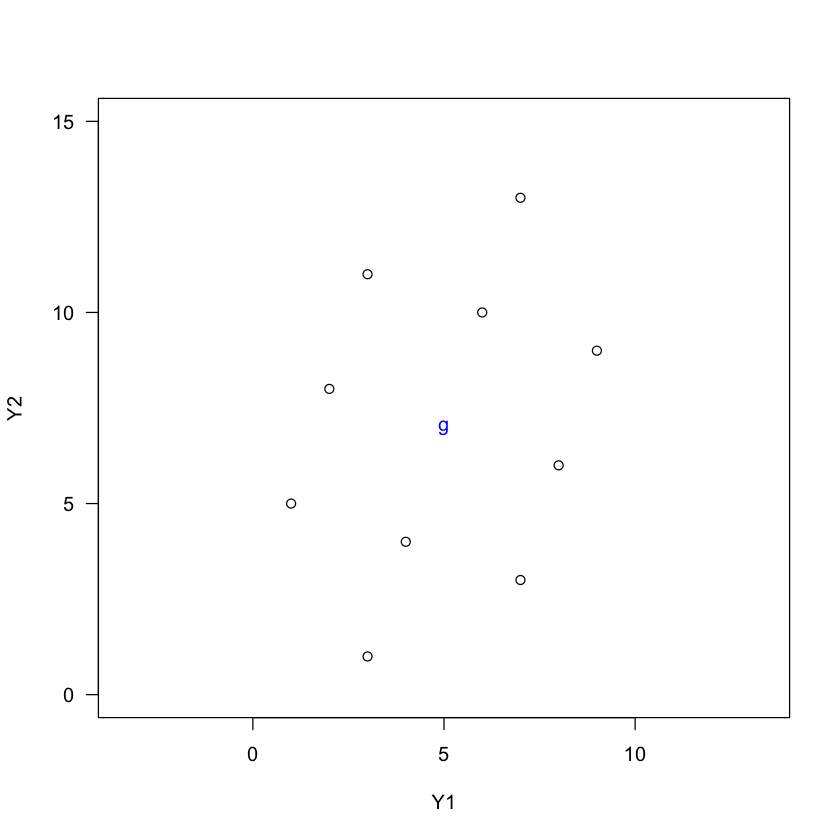

In [5]:
Y=cbind(Y1=Y1,Y2=Y2)
# identificación de las filas
rownames(Y)=paste("I",1:10,sep="")
"Matriz Y transpuesta"
t(Y)
"Centro de gravedad"
g=colMeans(Y);g=as.matrix(g);t(g)
plot(Y,las=1,xlim=c(0,10),ylim=c(0,15),asp=1)
#text(Y,labels=rownames(Y),pos=3)
text(g[1],g[2],col="blue",labels="g")



Diagrama de dispersión transladando el origen al centro de gravedad (centrado)

In [6]:
X = Y-rep(1,10)%*%t(g)
"Matriz centrada"
colnames(X)=c("X1","X2")
t(X)
t(colSums(X))

[1] "Matriz centrada"

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10
X1,4,2,3,-2,-4,-2,-1,2,-3,1
X2,2,6,-1,-6,-2,4,-3,-4,1,3


X1,X2
0,0


Diagrama de disprsión de datos centrados

[1] "Matriz de varianzas y covarianzas de Y o X"

,Y1,Y2
Y1,6.8,2.4
Y2,2.4,13.2


[1] "Matriz de correlaciones de Y o X"

,Y1,Y2
Y1,1.000,0.253
Y2,0.253,1.000


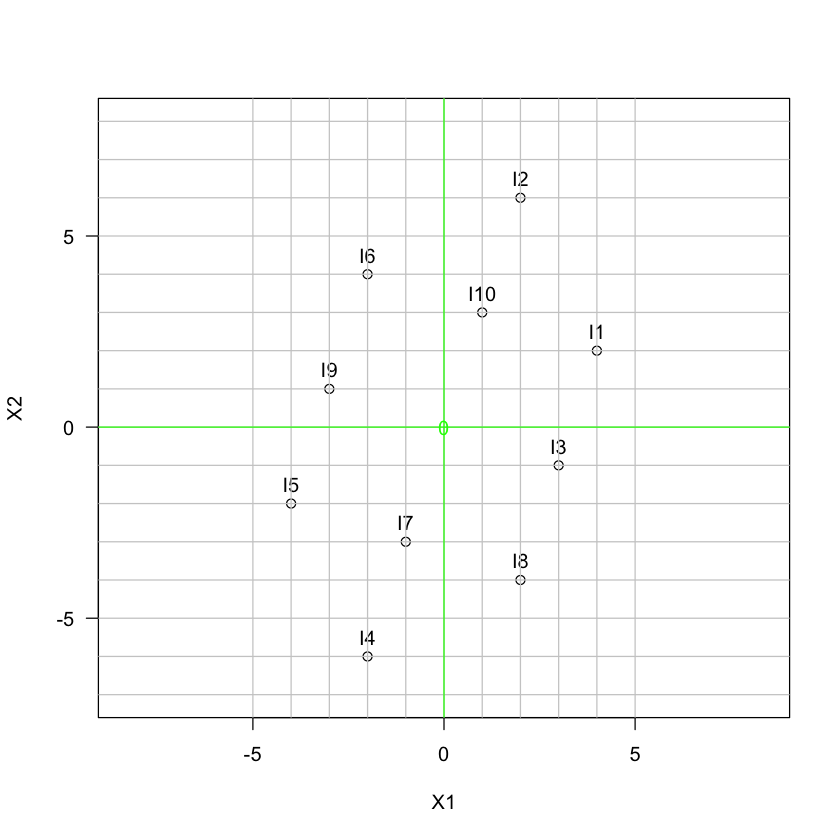

In [7]:
plot(X,las=1,asp=1,xlim=c(-5,5),ylim=c(-7,8))
text(X,labels=rownames(X),pos=3)
abline(v=-5:5,h=-7:8,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="green")
"Matriz de varianzas y covarianzas de Y o X"
V<-cov(Y)*9/10;V
"Matriz de correlaciones de Y o X"
R <- cor(Y); round(R,3)

### Eje de mayor proyección

A ojo: linea con origen en 0 y pendiente 3

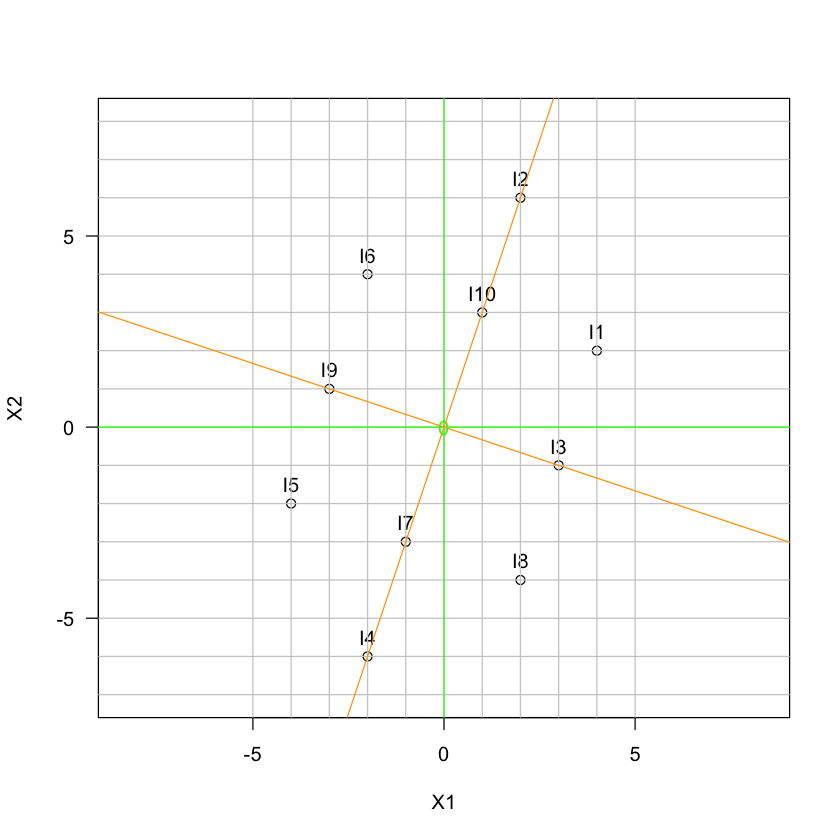

In [8]:
plot(X,las=1,asp=1,xlim=c(-5,5),ylim=c(-7,8))
text(X,labels=rownames(X),pos=3)
abline(v=-5:5,h=-7:8,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="green")
abline(0,3,col="orange")
# eje perpendicular
abline(0,-1/3,col="orange")

Completar el ejercicio en papel cuadriculado y midiendo las proyecciones con regla.
Para ver aquí el resultado (rotación) utilizo funciones de *ade4* y *FactoClass*.

Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10
Axis1,3.16,6.32,0.00,-6.32,-3.16,3.16,-3.16,-3.16,0.00,3.16
Axis2,-3.16,0.00,-3.16,0.00,3.16,3.16,0.00,-3.16,3.16,0.00


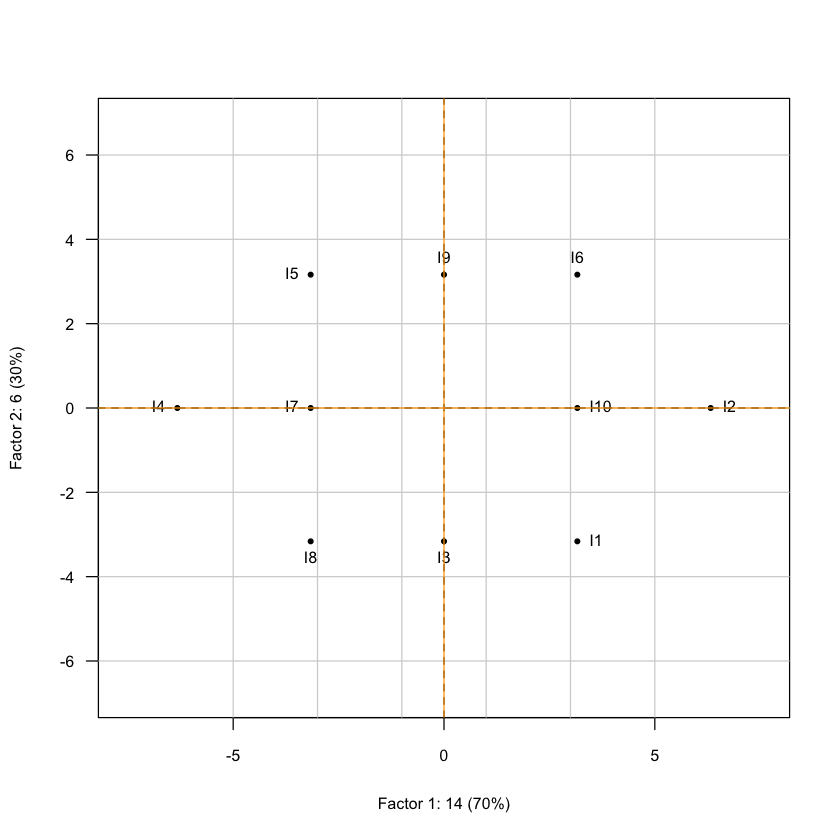

In [9]:
#install.packages(FactoClass)
library(FactoClass)
rota<-dudi.pca(Y,scannf=FALSE,scale=FALSE)
F=rota$li;round(t(F),2)
# grafica con plot.dudi{FactoClass}
plot(rota,Tcol=FALSE)
abline(v=0,h=0,col="orange")

In [10]:
#Matriz de varianzas y covarianzas de F
Lambda=var(F)*9/10
"Lambda"
round(Lambda,3)
"Traza"
sum(diag(Lambda))
"V"
V
"Traza de V"
sum(diag(V))

[1] "Lambda"

,Axis1,Axis2
Axis1,14,0
Axis2,0,6


[1] "Traza"

[1] 20

[1] "V"

,Y1,Y2
Y1,6.8,2.4
Y2,2.4,13.2


[1] "Traza de V"

[1] 20

## <span style="color:blue"><center>Geometría de tres variables</center></span>

Con el ejemplo de juguete café: cafe{FactoClass}

In [11]:
data(cafe)
Y<-cafe[1:10,1:3]
t(Y)

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Color,298.0,361.0,321.0,335.0,314.0,186.0,278.0,238,226.0,210.0
DA,385.1,481.3,422.6,444.3,368.7,346.6,422.6,403,368.7,368.7
EA,25.0,41.0,40.0,33.0,32.0,28.0,43.0,42,36.0,35.0


,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Color,298.0,361.0,321.0,335.0,314.0,186.0,278.0,238,226.0,210.0
DA,385.1,481.3,422.6,444.3,368.7,346.6,422.6,403,368.7,368.7
EA,25.0,41.0,40.0,33.0,32.0,28.0,43.0,42,36.0,35.0


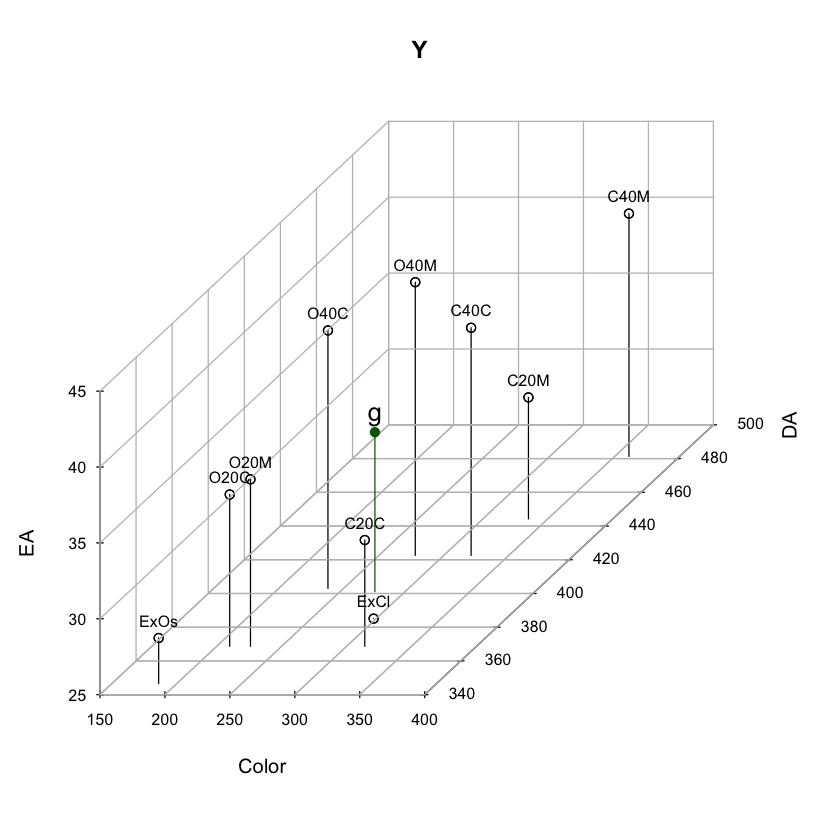

In [12]:
par(las=1); # grafica;
Y3D<-scatterplot3d(Y,main="Y",type="h",color="black",box=FALSE,
				   las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="black",pos=3); 
# poner el centro de gravedad en la gráfica
g <- colMeans(Y) 
Y3D$points3d(t(g),pch=19,col="darkgreen",type = "h");
text(Y3D$xyz.convert(t(g)),labels="g",pos=3,col="black",
     cex=1.3);
t(Y)


Datos centrados

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C,g
Color,21.30,84.30,44.30,58.30,37.30,-90.70,1.30,-38.70,-50.70,-66.70,276.70
DA,-16.06,80.14,21.44,43.14,-32.46,-54.56,21.44,1.84,-32.46,-32.46,401.16
EA,-10.50,5.50,4.50,-2.50,-3.50,-7.50,7.50,6.50,0.50,-0.50,35.50


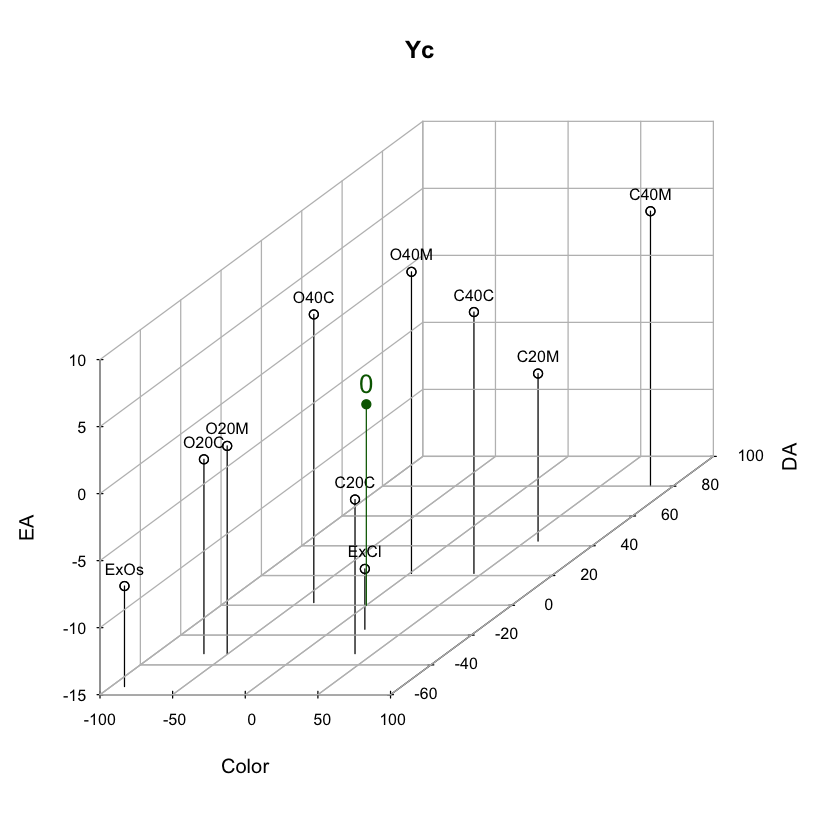

In [13]:
# cálculo de la matriz de datos centrados y representación en 3D
Yc<-scale(Y,scale=FALSE)   #calculo
attr(Yc,"scaled:center")->g  #la función scale muestra el centro de gravedad
t(rbind(Yc,g))
# grafica de datos centrados
par(las=1);
Yc3D<-scatterplot3d(Yc,main="Yc",type="h",color="black",
	               box=FALSE,las=1);
Yc3D$points3d(Yc,pch=1);
addgrids3d(Yc,grid=c("xy", "xz", "yz"));
text (Yc3D$xyz.convert(Yc),labels=rownames(Yc),cex=0.8,
	  col="black",pos=3);
Yc3D$points3d(t(c(0 ,0 ,0)),pch=19 , col ="darkgreen",type = "h");
text(Yc3D$xyz.convert (t(c(0 ,0 ,0))),labels ="0",pos =3, 
     col ="darkgreen",cex =1.3);


#### **Cálculo y gráfica 3D de la matriz de datos estandarizados X**

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C,g,Des
Color,0.36,1.44,0.75,0.99,0.63,-1.54,0.02,-0.66,-0.86,-1.14,276.70,58.7
DA,-0.39,1.92,0.51,1.04,-0.78,-1.31,0.51,0.04,-0.78,-0.78,401.16,41.6
EA,-1.72,0.90,0.74,-0.41,-0.57,-1.23,1.23,1.07,0.08,-0.08,35.50,6.1


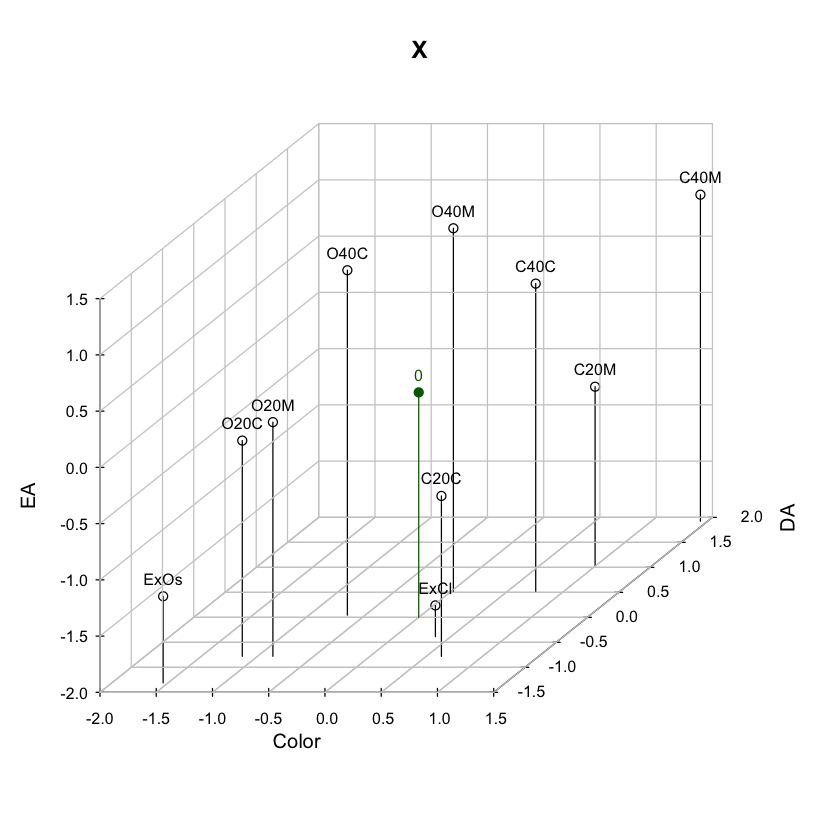

In [14]:
# Cálculo de matriz X estandarizada
X<-scale(Y)
# aquí la función scale calcula la media y la desviación estándar
# las varianzas que calcula R es la muestral: se divide por n-1
round(attr(X,"scaled:scale"),1)->Des
# X transpuesta + g + Des
t(round(rbind(X,g,Des),2))
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(X,main="X",type ="h",box=FALSE,asp=1); 
X3D$points3d(Yc,pch=1);
addgrids3d(X,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(X),labels=rownames(X),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);


#### Rotación de ejes o cambio de base

In [15]:
acp=dudi.pca(Y,scannf=FALSE,nf=3)
"Tabla en nuevos ejes"
F=acp$li;round(t(F),2)

[1] "Tabla en nuevos ejes"

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Axis1,-0.89,2.68,1.18,1.14,-0.44,-2.47,0.98,0.15,-1.04,-1.29
Axis2,-1.68,-0.22,0.15,-1.02,-0.82,-0.04,1.01,1.31,0.65,0.67
Axis3,-0.11,-0.29,0.33,-0.35,0.79,-0.38,0.06,-0.05,0.11,-0.12


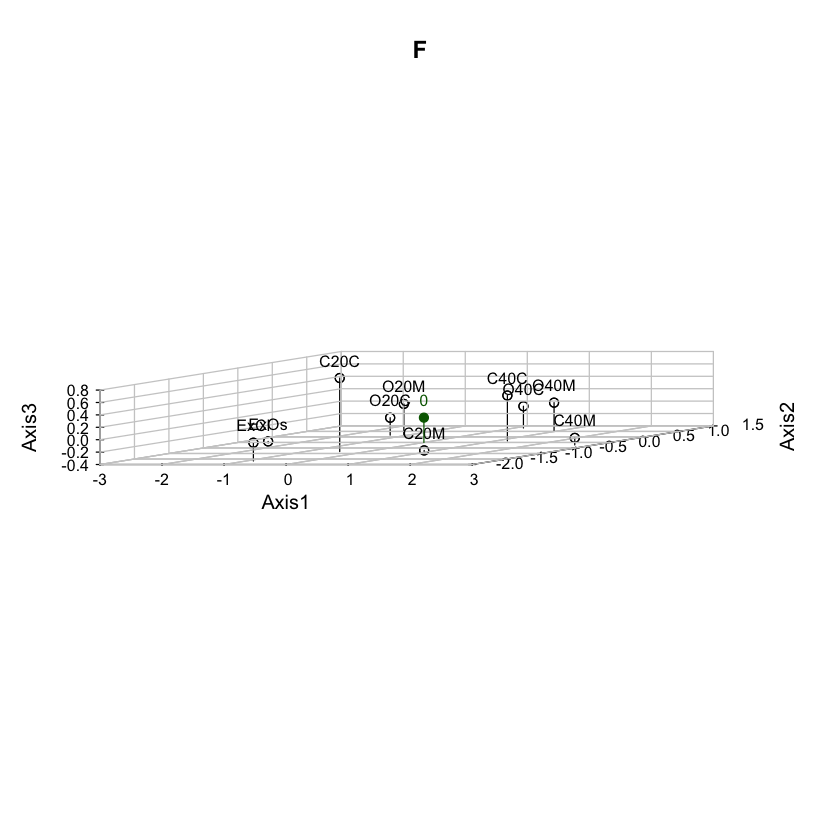

In [16]:
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(F,main="F",type ="h",box=FALSE,asp=1); 
X3D$points3d(F,pch=1);
addgrids3d(F,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(F),labels=rownames(F),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);

#### Mejor plano de proyección

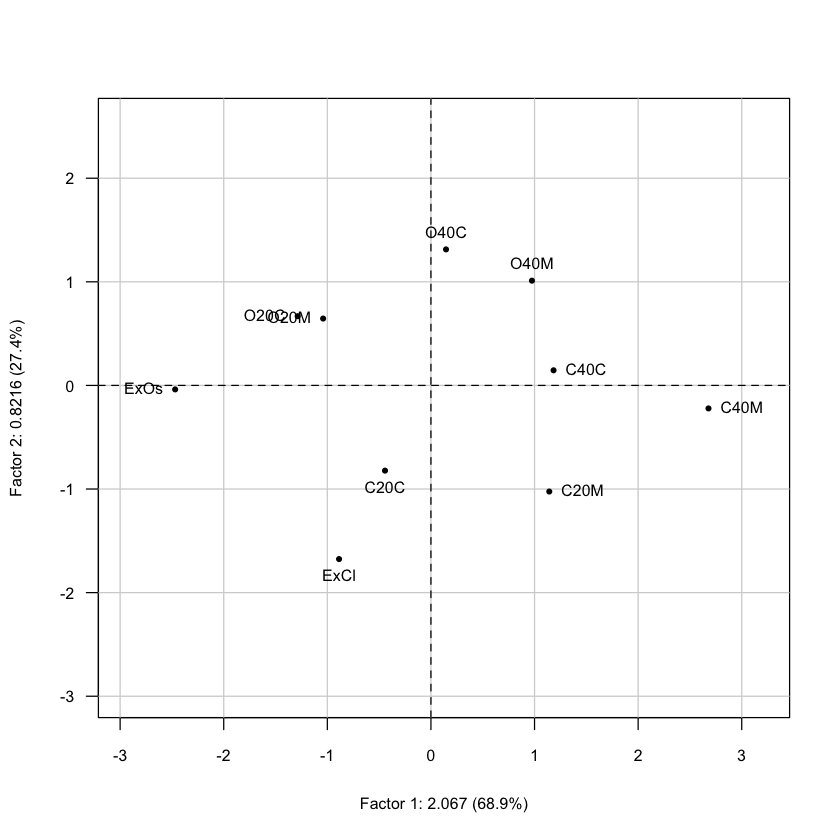

In [17]:
plot(acp,Tcol=FALSE,asp=1)

#### Círculo de correlaciones

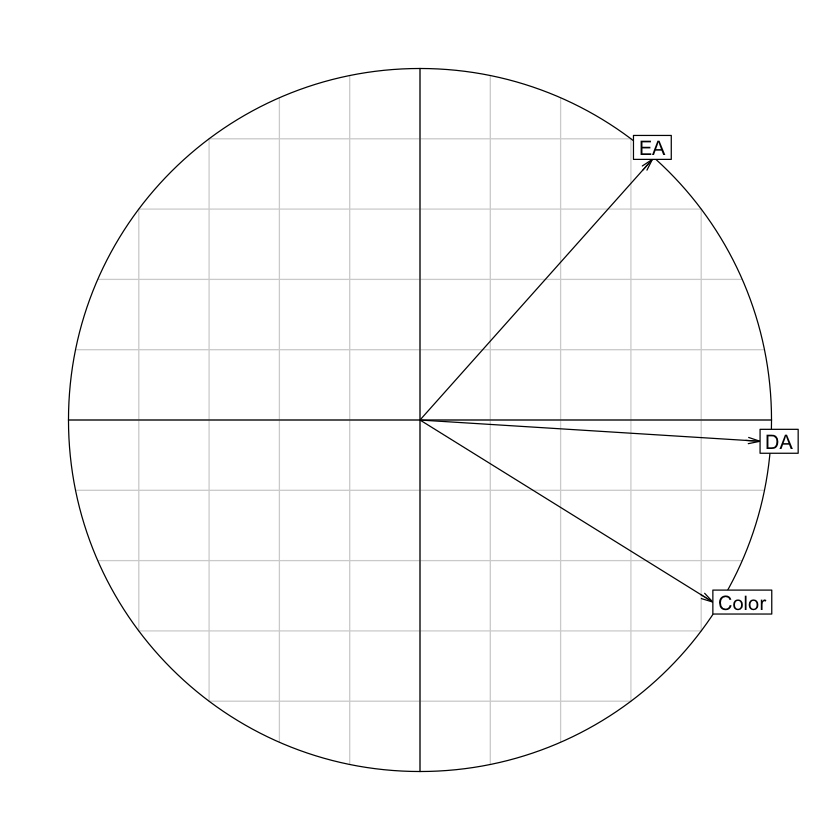

In [18]:
s.corcircle(acp$co)

#### Proyección en el plano 1-3

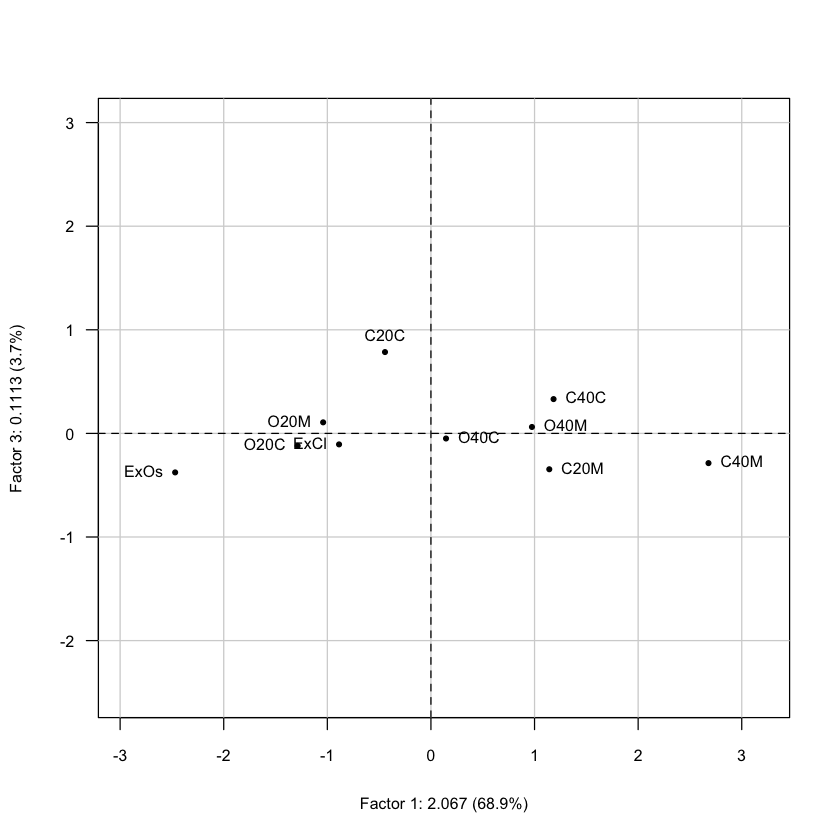

In [19]:
plot(acp,1,3,Tcol=FALSE,asp=1)

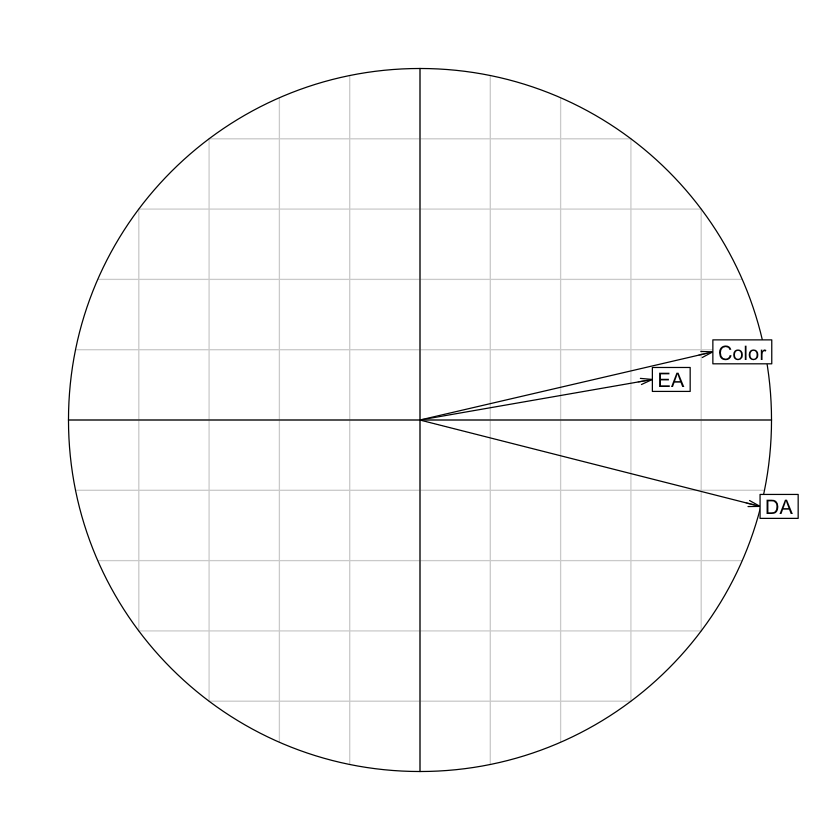

In [20]:
s.corcircle(acp$co,1,3)

## <span style="color:blue"><center>Geometría de *p* variables y *n* individuos</center></span>


<figure> 
<img src="../imagenes/esquemaTabla.png"  width="240" height="240" align="left"/> 
</figure>

## <span style="color:blue"><center>Ejemplo de *p=5* variables y *n=445* individuos</center></span>

Resultados de los 5 componentes de los admitidos a las 7 carreras de la Facultad de Ciencias para el primer semestre de 2013. 

#### Extracto de la tabla


In [63]:
data(admi)
Y=admi[,2:6]
Y[seq(1,445,50),]
# Matriz de varianzas y covarianzas
V=var(Y)*444/445
round(V,3)

,mate,cien,soci,text,imag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.03,10.84,12.08,10.62,10.68
51,10.64,13.17,10.38,11.92,9.89
101,14.07,11.16,11.03,12.87,10.41
151,10.34,12.12,10.70,11.21,12.54
201,9.68,10.16,11.03,10.62,10.68
251,11.48,12.12,11.03,11.54,10.96
301,10.34,10.16,10.05,10.35,10.41
351,14.07,13.17,10.05,11.21,12.54
401,10.03,10.51,12.08,11.21,11.26


,mate,cien,soci,text,imag
mate,1.281,0.386,0.237,0.271,0.239
cien,0.386,0.997,0.138,0.200,0.123
soci,0.237,0.138,0.746,0.318,0.091
text,0.271,0.200,0.318,0.980,0.046
imag,0.239,0.123,0.091,0.046,1.004


ACP sin estandarizar, ya que los resultados están expresados con media 10 y desviación estandar 1, con todos los resultados (admitidos y no admitidos para todas las carreras). 

Inertia information:
Call: inertia.dudi(x = acpadmi)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  1.9238   1.924   38.41
Ax2  0.9941   2.918   58.26
Ax3  0.8510   3.769   75.25
Ax4  0.7219   4.491   89.67
Ax5  0.5176   5.009  100.00

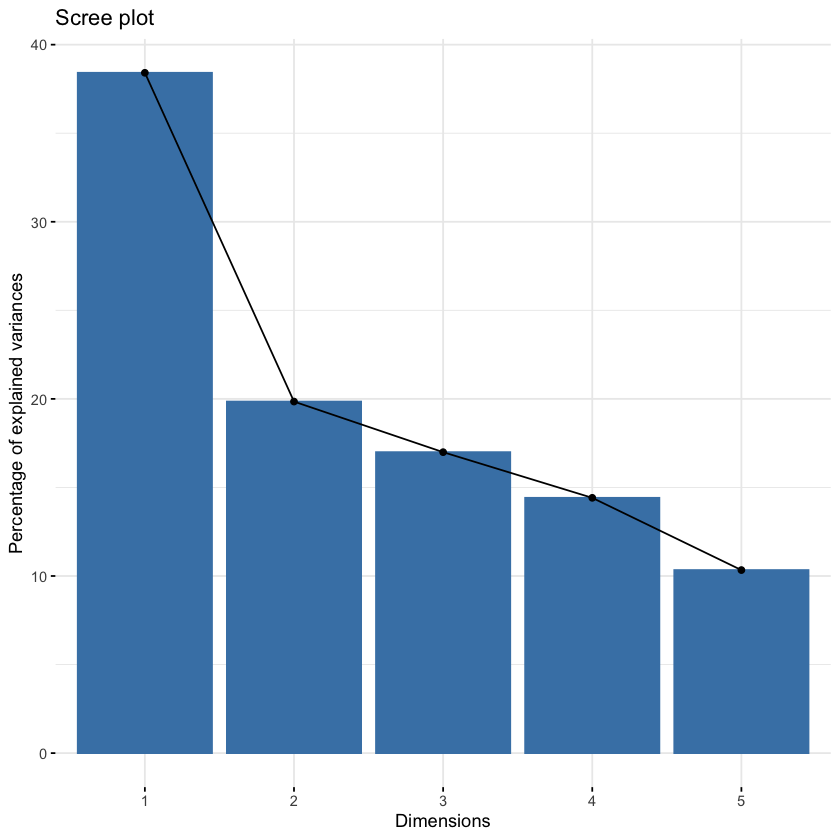

In [68]:
acpadmi=dudi.pca(Y,scale=FALSE,scannf=FALSE)
# histograma de valores propios
library(factoextra)
fviz_eig(acpadmi)
inertia(acpadmi)

In [71]:
"promedio de valores propios"
round(sum(acpadmi$eig)/5,4)

[1] "promedio de valores propios"

[1] 1.0017

**Dos ejes son suficientes para una síntesis de los resultados**
 1. La varianza del primer eje es casi el doble de la del segundo, en el gráfico se descata de los demás, su varianza corresponde al 38.4 de la inercia
 2. El segundo eje alcanza casi el valor del promedio.
 3. El primer plano factorial (ejes 1 y 2) retiene un 58.3% de la inercia total (5.009).

#### Primer plano factorial de las variables

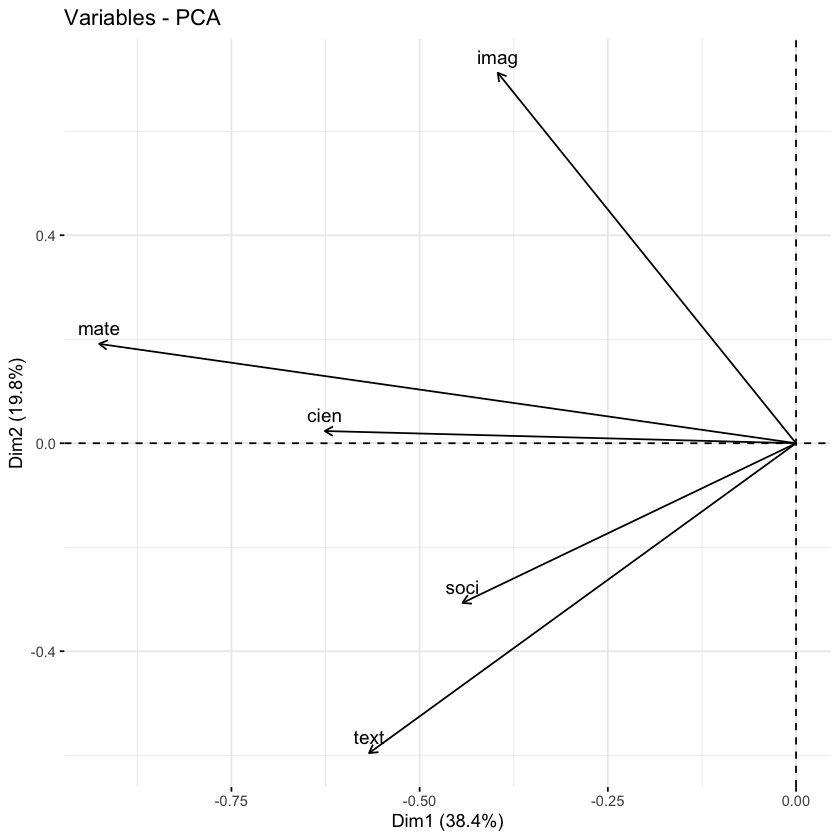

In [72]:
fviz_pca_var(acpadmi)

El primer eje es un factor tamaño: el lado negativo del primer eje significa mayores resultados en todos los componentes, sobretodo en matemáticas. Los coeficientes del primer eje son:

In [78]:
rownames(acpadmi$c1)
round(acpadmi$c1[,1],3)

[1] "mate" "cien" "soci" "text" "imag"

[1] -0.667 -0.451 -0.319 -0.409 -0.286

El lado positivo del segundo eje indica sobretodo mejores resultados en imagen y el negativo en textual, seguido de sociales. Los coeficientes son:

In [79]:
rownames(acpadmi$c1)
round(acpadmi$c1[,2],3)

[1] "mate" "cien" "soci" "text" "imag"

[1]  0.192  0.024 -0.308 -0.598  0.715

#### Primer plano factorial de los admitidos

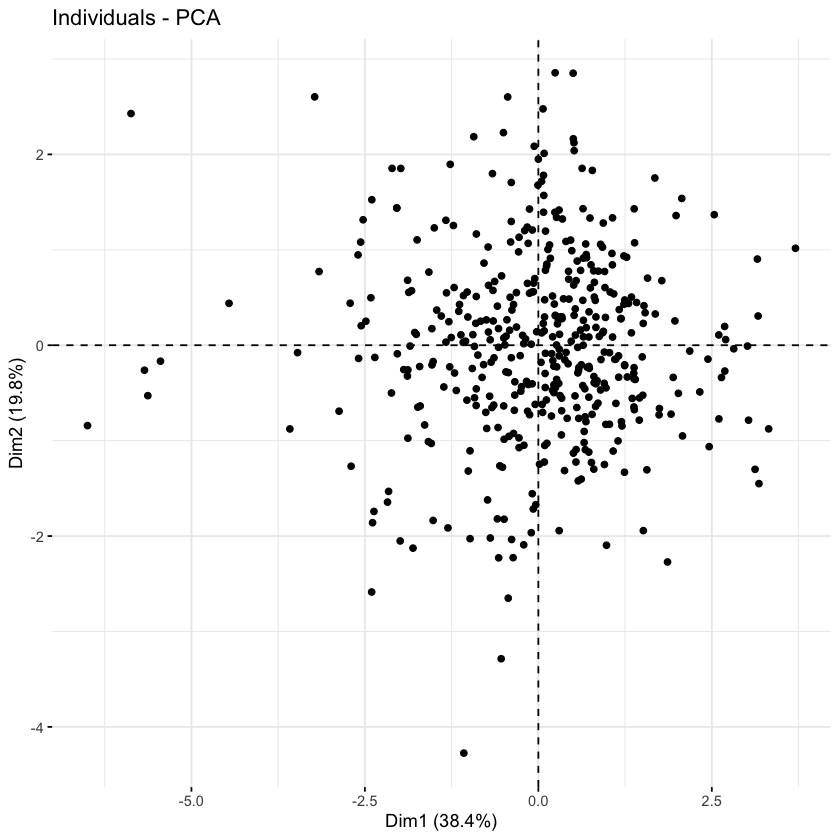

In [140]:
fviz_pca_ind(acpadmi,label="NONE")

#### La carrera como variable cualitativa suplementaria

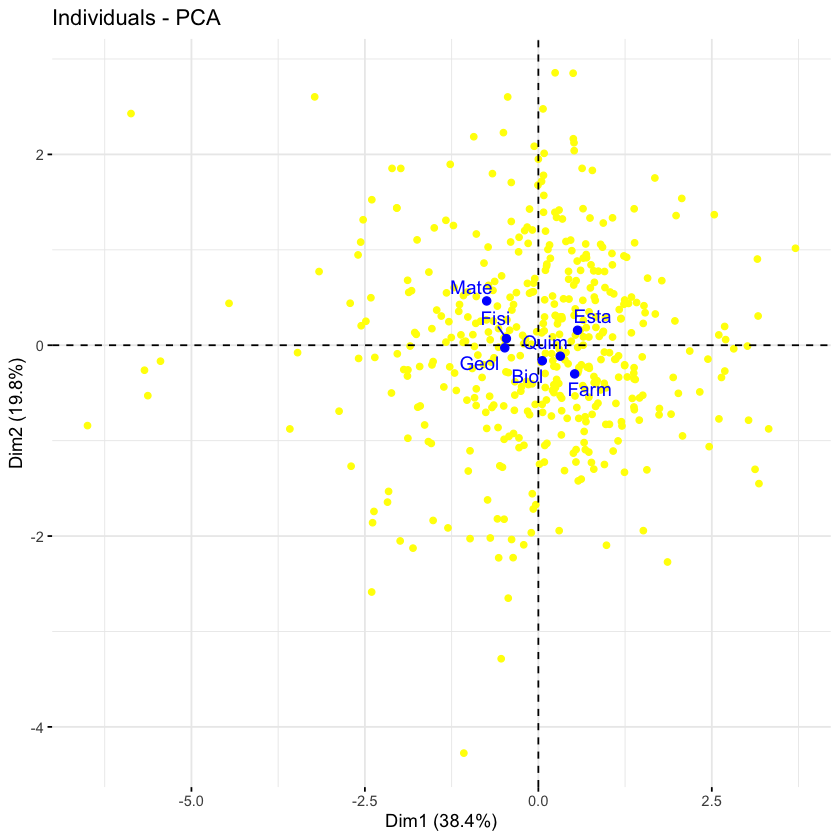

In [148]:
carrsup=supqual(acpadmi,as.data.frame(admi$carr))
#plano12
plano12=fviz_pca_ind(acpadmi,col.ind="yellow",label="NONE")
fviz_add(plano12,carrsup$coor,repel=TRUE)

#### *Zoom* de las carreras 

,coor.Axis1,coor.Axis2,tval.Axis1,tval.Axis2
,<dbl>,<dbl>,<dbl>,<dbl>
Biol,0.057,-0.162,0.350,-1.395
Esta,0.565,0.157,3.583,1.385
Farm,0.523,-0.301,3.522,-2.816
Fisi,-0.461,0.069,-3.326,0.696
Geol,-0.484,-0.027,-2.466,-0.194
Mate,-0.745,0.464,-4.160,3.606
Quim,0.316,-0.115,1.953,-0.984


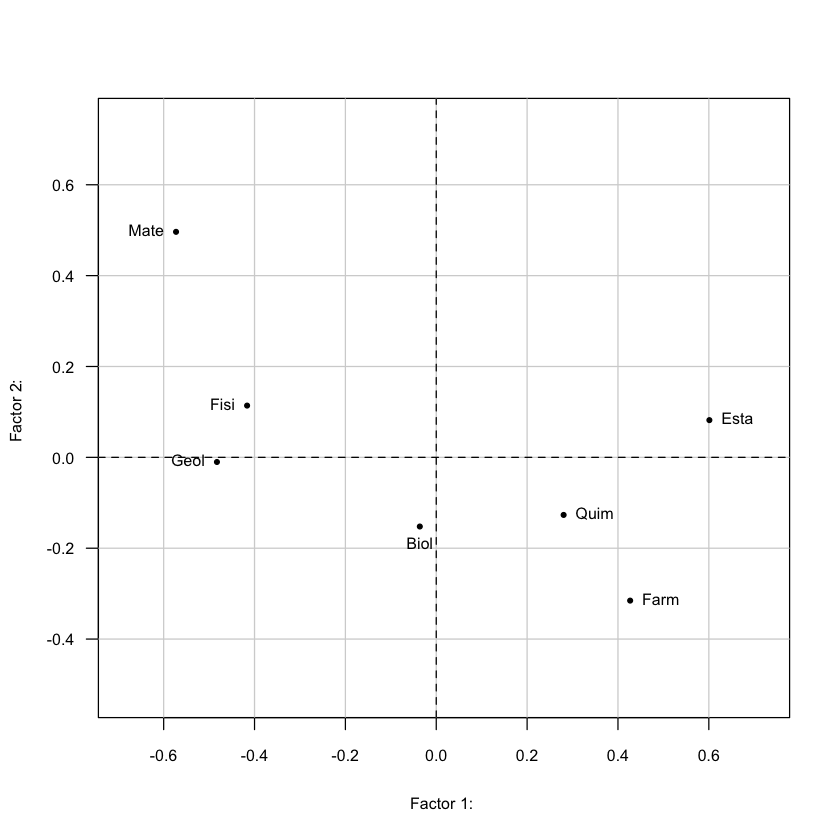

In [147]:
plotfp(supcarr$coor)
round(data.frame(coor=carrsup$coor,tval=carrsup$tv),3)

Los promedios de las carreras quedan ordenadas de mayor (-) a menor(+) en el primer eje: Matemáticas, Física, Geología, Biología, Química, Farmacia y Estadística. En el segundo eje se oponen Matemáticas (+) y Farmacia (-), lo que indica mejor rendimiento promedio en imagen para los admitidos a Matemáticas y mayor en Textual para Farmacia.

## <span style="color:blue"><center>Análisis en componentes principales generalizado *ACP*(**X,M,N**)</center></span>

Casi todos los métodos en ejes principales (factoriales) se puede derivar de este procedimiento general. Aunque es un poco técnico tambiés se puede ver como una caja negra, quienes quierar entenderlo matemáticamente necesitan conocer los conceptos de álgebra lineal, específicamente lo que tiene que ver con los espacios vectoriales en los reales con producto interno. De un producto interno se deriva una métrica (distancia) y todo lo que se requiere para la representación gráfica multidimensional de tablas de datos. 

Una tabla de datos se se transforma en una matriz **X** del *ACP*(**X,M,N**) es la que se va a representar geométricamente. **X** tiene $n$ filas y $p$ columnas.

<figure> 
<img src="../imagenes/esquemaTabla.png"  width="240" height="240" align="left"/> 
</figure>

La matriz **X** tiene dos representaciónes geométricas:
1. $n$ vectores fila (puntos fila) en $\mathbb{R}^p$, es decir que los ejes son las columnas de **X**. *Espacio de las filas*. *Nube de puntos fila*
2. $p$ vectores columna (puntos, flechas en el ACP) en $\mathbb{R}^n$ *Espacio de las columnas*. *Nube de columnas*

Los dos espacios están relacionados y se denomina *dualidad* entre las dos representaciones. Esto se puede resumir en un diagrama de dualidad y sus fórmulas asociadas. 

### <span style="color:blue"><center>Diagrama de dualidad del *ACP*(**X,M,N**)</center></span>

<figure> 
<img src="../imagenes/DuDiMDpn.png"  width="480" height="480" align="left"/> 
</figure>

$E = \mathbb{R}^p$ es el espacio de las filas, $E = \mathbb{R}^p$ es el espacio de las columnas.
$E^{*}$ se llama el espacio dual de $E$, y $F^{*}$ el dual de $F=\mathbb{R}^p$.

Esta es la "caja negra" del *ACP*(**X,M,N**) y abrirla completamente require conocimientos de geometría euclidiana multidimensional, que está basada en álgebra lineal. En resumen para los métodos con matrices de métrica diagonales:
1. **X** matriz obtenida mediante alguna transformación de los datos.
2. **M** matriz de producto interno, *métrica* en el espacio de las filas y de pesos de las columnas (vector en la diagonal).
3. **N** matriz de *métrica* en el espacio de las columnas y de pesos en el espacio de las filas.

Con la función  *as.dudi{ade4}* se obtiene los resultados de un *ACP*(**X,M,N**):

<figure> 
<img src="../imagenes/Diagasdudi.png"  width="960" height="960" align="left"/> 
</figure>

Esta función es interna del *ade4* y es llamada por los otros procedimientos específicos.

A continución se presentan, con ejemplos de juquete, los siguientes métodos:
1. ACP canónino = $ACP(\mathbf{X},\mathbf{I}_p,\frac{1}{n}\mathbf{I}_n)$, ya visto.
2. Imagen geométrica de matrices de varianzas y covarianzas o de correlaciones.
3. Imagen geométrica de una matriz de disitancias euclidianas.
4. Análisis de correspondencias simples (ACS).
5. Análisis de correspondencias múltiples.

### <span style="color:blue"><center>Análisis en componentes principales (ACP)</center></span>

<figure> 
<img src="../imagenes/Diagdudipca.png"  width="960" height="960" align="left"/> 
</figure>

### <span style="color:blue"><center>Imagen geométrica de matrices de correlaciones</center></span>

Diagrama de dualidad incompleto = Parte superior del diagrma de dualidad =  $ACP(\mathbf{V,M})$

<figure> 
<img src="../imagenes/DuDiV.png"  width="480" height="480" align="left"/> 
</figure>

* **V**: matriz de covarianzas o matriz de correlaciones (no se conoce **X**)

* $\mathbf{M}=\mathbf{I}_p$

* Valores y vectores propios de **V**

* $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_p $

* $\mathbf{u}_1, \mathbf{u}_2, \cdots, \mathbf{u}_p$

* Coordenadas: $G_s = \sqrt{\lambda_s} \mathbf{u}_s$


#### Ejemplo: matriz de correlaciones de los componentes del examen de admisión de los admitidos a las siete carreras de la Facultad de Ciencias Unal Bogotá, primer semestre 2013

1. Cálculo de la matriz de correlaciones para el ejemplo

In [150]:
library(FactoClass)
data(admi)
"Matriz de correlaciones"
V <- cor(admi[,2:6])
as.dist(round(V,3)) # matriz de correlaciones


[1] "Matriz de correlaciones"

      mate  cien  soci  text
cien 0.341                  
soci 0.242 0.160            
text 0.242 0.202 0.372      
imag 0.211 0.123 0.105 0.046

2. Obtención de las coordenadas de las variables

In [153]:
eigV <- eigen(V)
Lambda<-diag(eigV$values)
U<-eigV$vectors
G<-U%*%sqrt(Lambda)
rownames(G)<-colnames(V)
round(G,3)

mate,-0.706,0.259,0.204,0.595,-0.195
cien,-0.612,0.242,0.602,-0.387,0.235
soci,-0.645,-0.420,-0.351,0.115,0.521
text,-0.648,-0.496,-0.105,-0.273,-0.498
imag,-0.378,0.691,-0.576,-0.214,-0.050


3. Selección del número de ejes para lectura e interpretación

[1] "Promedio de valores propios"

[1] 1

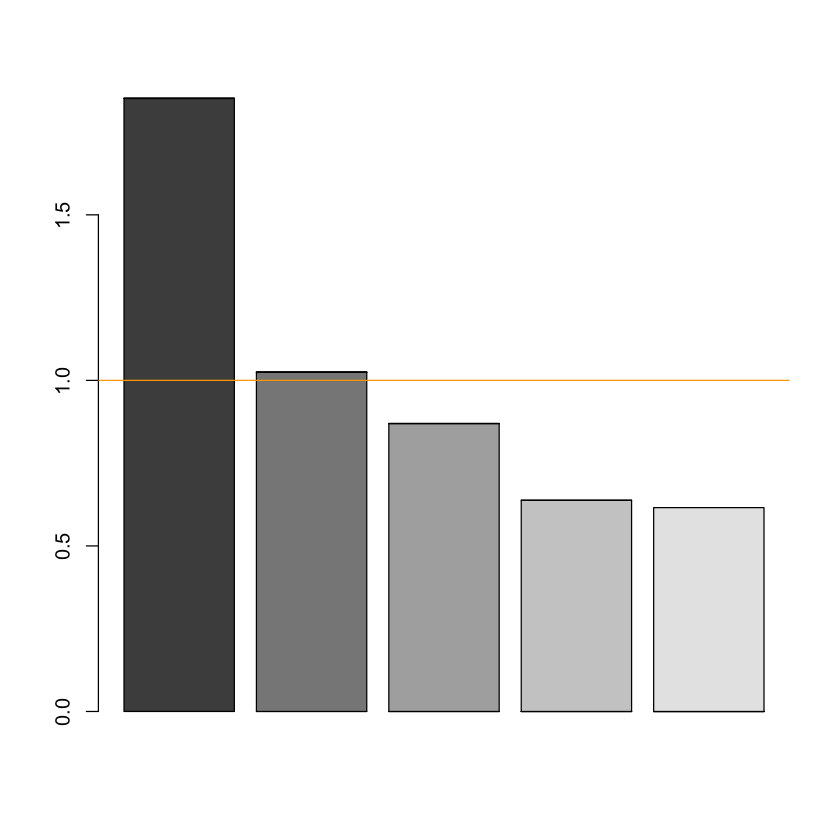

In [157]:
barplot(Lambda)
"Promedio de valores propios"
sum(Lambda)/5
abline(h=1,col="orange")

In [163]:
valp = diag(Lambda)
tablavp = data.frame(valp,porvp=valp*100/sum(valp),
                     poracu=cumsum(valp)*100/sum(valp))
round(tablavp,2)

valp,porvp,poracu
<dbl>,<dbl>,<dbl>
1.85,37.03,37.03
1.02,20.50,57.53
0.87,17.39,74.93
0.64,12.76,87.69
0.62,12.31,100.00


Dos ejes son suficientes para una lectura sintética de la matriz de correlaciones

4. Círculos de correlaciones

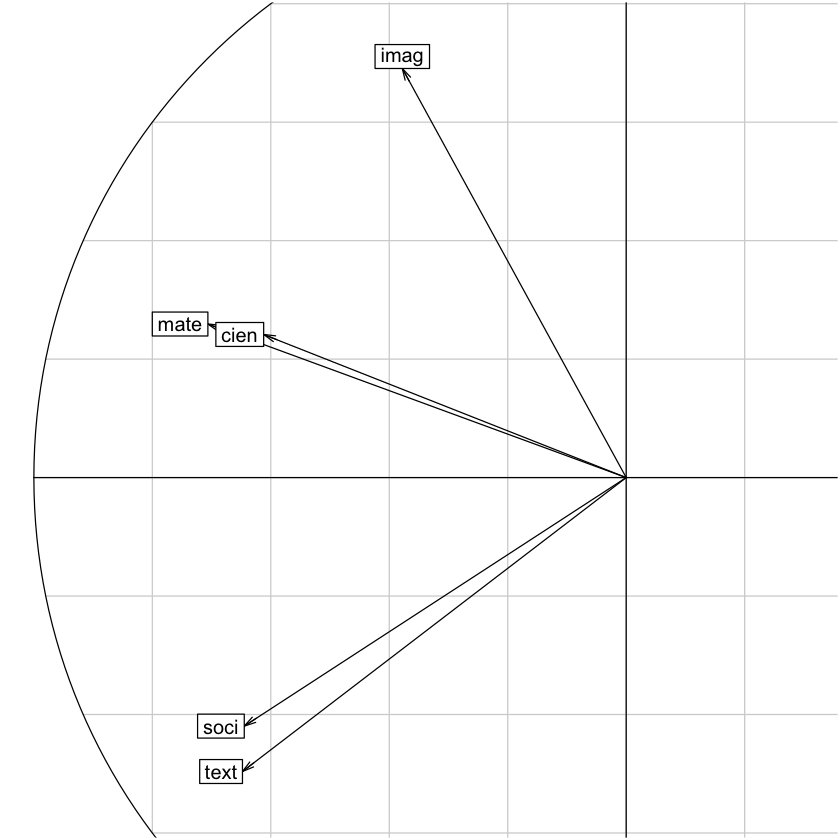

In [165]:
# primer círculo de correlaciones
s.corcircle(G,fullcircle=FALSE)

Sociales y textual tienen entre si una correlación apreciable, los mismo que ciencias y matemáticas; matemáticas y ciencias tienen correlación baja con imagen; imagen practicamente no está correlacionada con sociales, ni textual. A continuación se presenta, de nuevo, la matriz de correlaciones, para la lectura numérica.

In [166]:
as.dist(round(V,3))

      mate  cien  soci  text
cien 0.341                  
soci 0.242 0.160            
text 0.242 0.202 0.372      
imag 0.211 0.123 0.105 0.046

### <span style="color:blue"><center>Imagen geométrica de matrices de distancias euclidianas = Análisis en coordenadas principales (ACO)</center></span>

**D** es una matriz de distancias euclidianas y *nf* el número de ejes a retener para lectura e interpretación.

#### <span style="color:blue"><center>Diagrama de dualidad incompleto</center></span>

<figure> 
<img src="../imagenes/DudiW.png"  width="480" height="480" align="left"/> 

Es la parte inferior del diagrama no se tiene la parte superior porque no se conocen los datos.

De la matriz de distancias **D** se obtiene la matriz de productos internos **W**, la métrica **N** suele ser la matriz identidad $n \times n$ multiplicada por $1/n$. Entonces a la matriz $\frac{1}{n} \mathbf{W}$ es a la que se le halla los valores y vectores propios.

Estos calculos y otros se obtienen con la función *dudi.pco{ade4}*.


#### <span style="color:blue"><center>Función *dudi.pco{ade4}*</center></span>

<figure> 
<img src="../imagenes/Diagdudipco.png"  width="960" height="960" align="left"/> 

### Ejemplo de juguete: imagen euclidiana de la matriz de distancias el ejemplo café con todas las variables, estandarizadas.

1. Obtención de la matriz de distancias eucludianas

In [212]:
data(cafe)
D=dist(scale(cafe))
round(D,2)

     ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C Com1
C40M 8.67                                                  
C40C 7.44 2.48                                             
C20M 5.71 4.02 3.29                                        
C20C 4.47 5.34 3.67 2.79                                   
ExOs 4.25 9.24 7.47 6.80 5.36                              
O40M 9.62 4.01 3.80 5.77 6.42 8.75                         
O40C 7.99 5.03 3.47 5.31 5.17 6.57 3.67                    
O20M 6.15 6.00 4.19 4.80 4.03 4.18 5.07 3.03               
O20C 5.50 6.69 5.02 5.22 4.29 3.49 5.74 3.65 2.10          
Com1 5.89 6.55 5.55 5.08 4.27 5.51 6.75 6.09 4.74 4.32     
Com2 4.81 7.98 6.91 5.76 4.63 5.74 8.48 7.32 5.92 5.51 3.69

2. Selección del número de ejes

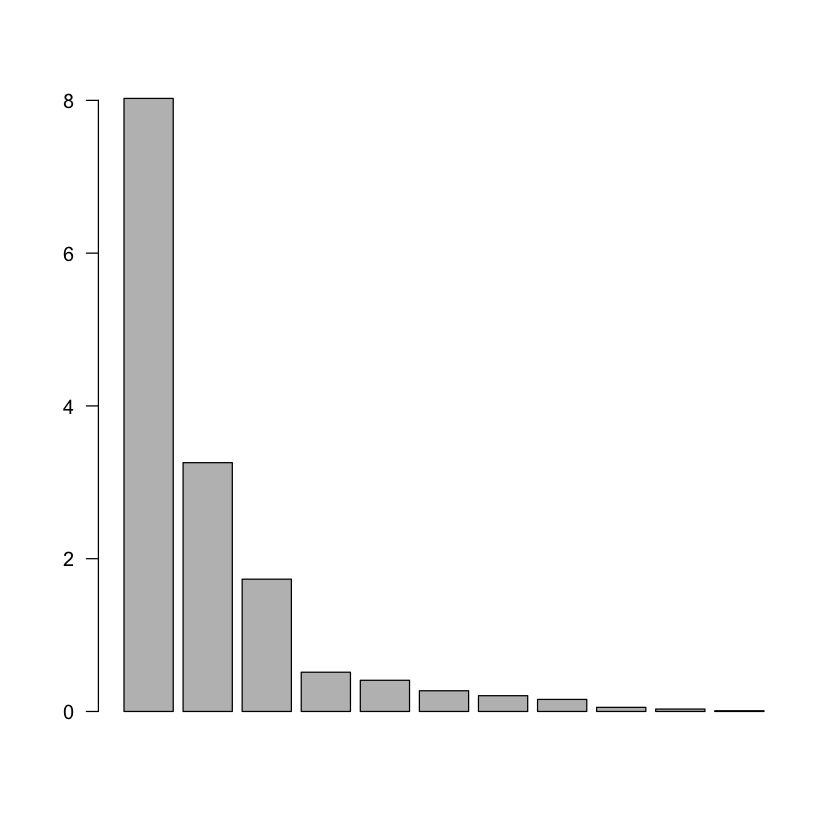

In [214]:
aco <- dudi.pco(D,scannf=FALSE)
barplot(aco$eig,las=1)

In [215]:
round(inertia(aco)$tot.inertia,2)->ineraco
ineraco
"Promedio de valores propios"
round(mean(ineraco$inertia),2)

,inertia,cum,cum(%)
,<dbl>,<dbl>,<dbl>
Ax1,8.03,8.03,54.72
Ax2,3.26,11.28,76.93
Ax3,1.73,13.01,88.74
Ax4,0.51,13.53,92.24
Ax5,0.41,13.94,95.02
Ax6,0.27,14.21,96.87
Ax7,0.21,14.41,98.28
Ax8,0.16,14.57,99.35
Ax9,0.05,14.63,99.72


[1] "Promedio de valores propios"

[1] 1.33

Tres valores propios están por encima del promedio y acumulan el 88.7\% de la inercia.

3. Primer plano factorial

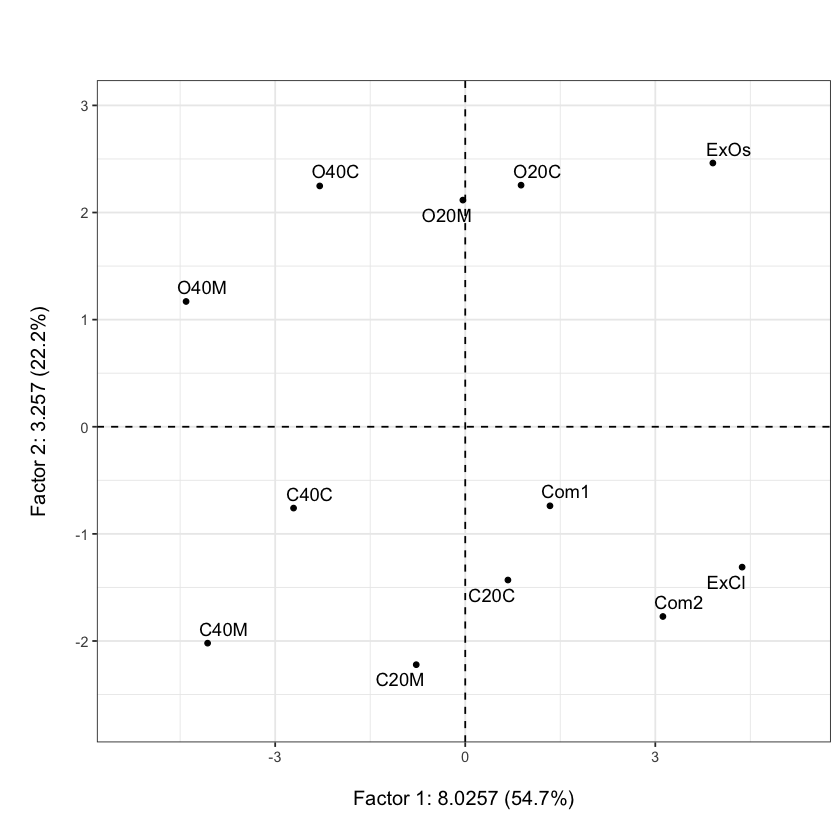

In [216]:
# para agregar el tercer eje a las tablas del objeto aco
aco<-redo.dudi(aco,newnf=3)
plot(aco,gg=T,Tcol=FALSE)

Se observa que el primer eje ordena los cafes de más contaminados (a la izquierda del plano) y el segundo eje separa los de tostación clara (abajo) de los de tostación oscura (arriba).

4. Plano factorial 1-3

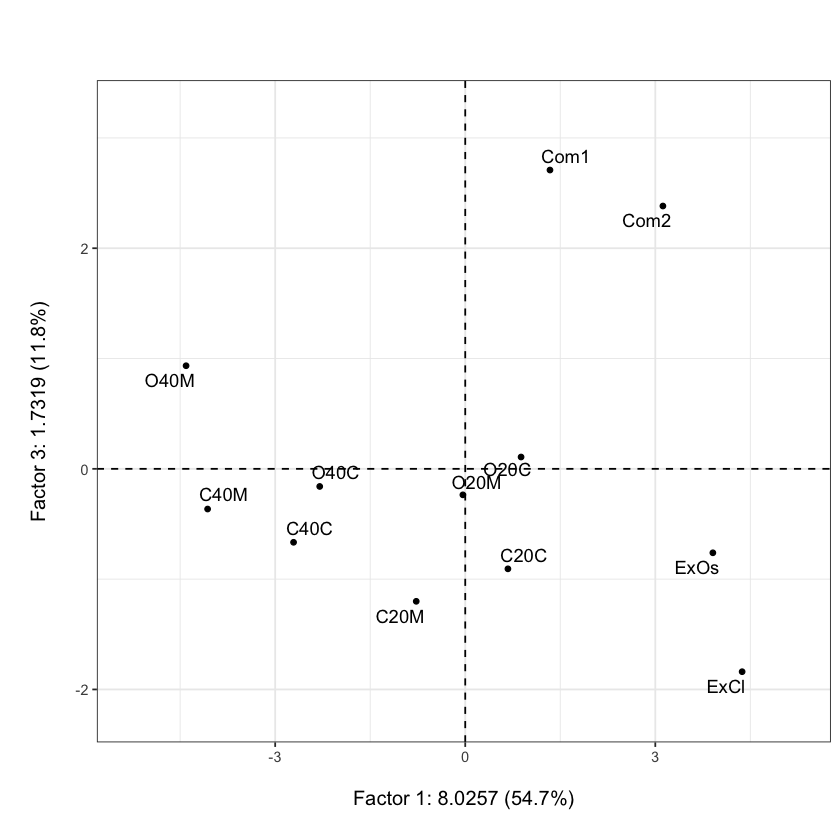

In [217]:
plot(aco,1,3,gg=T,Tcol=FALSE)

Nótese que el tercer eje separa los dos cafés comerciales de los 10 tratamientos experimentales.




## <span style="color:blue"><center>Análisis de correspondencias simples (ACS)</center></span>

<figure> 
<img src="../imagenes/Diagdudicoa.png"  width="960" height="960" align="left"/> 

**K** es una tabla de contingencia, de frecuencias o de números positivos; y *nf* el número de ejes a retener para lectura e interpretación.

### <span style="color:blue"><center>Ejemplo de juguete</center></span>

Tabla de contingencia de admitidos a la Facultad de Ciencias *Carrera x Estrato

1. Tablas de: contingencia **K**, de frecuencias relativas **F**, de desvidos al modelo de indepencia **F**-**A**

In [171]:
K<-unclass(table(admi$carr,admi$estr))
addmargins(K)

,bajo,medio,alto,Sum
Biol,23,26,14,63
Esta,29,29,8,66
Farm,30,36,7,73
Fisi,27,36,19,82
Geol,18,9,18,45
Mate,21,25,7,53
Quim,31,24,8,63
Sum,179,185,81,445


In [174]:
F = K/sum(K)
addmargins(round(F*100,1))

,bajo,medio,alto,Sum
Biol,5.2,5.8,3.1,14.1
Esta,6.5,6.5,1.8,14.8
Farm,6.7,8.1,1.6,16.4
Fisi,6.1,8.1,4.3,18.5
Geol,4.0,2.0,4.0,10.0
Mate,4.7,5.6,1.6,11.9
Quim,7.0,5.4,1.8,14.2
Sum,40.2,41.5,18.2,99.9


In [181]:
# modelo de independencia A
A<-rowSums(F)%*%t(colSums(F))
colnames(A)<-colnames(F)
"Modelo de independencia en procentaje"
addmargins(round(A*100,1))
"Devios de la independencia en porcentaje"
round((F-A)*100,2)

[1] "Modelo de independencia en procentaje"

,bajo,medio,alto,Sum
,5.7,5.9,2.6,14.2
,6.0,6.2,2.7,14.9
,6.6,6.8,3.0,16.4
,7.4,7.7,3.4,18.5
,4.1,4.2,1.8,10.1
,4.8,5.0,2.2,12.0
,5.7,5.9,2.6,14.2
Sum,40.3,41.7,18.3,100.3


[1] "Devios de la independencia en porcentaje"

,bajo,medio,alto
Biol,-0.53,-0.04,0.57
Esta,0.55,0.35,-0.90
Farm,0.14,1.27,-1.41
Fisi,-1.34,0.43,0.92
Geol,-0.02,-2.18,2.20
Mate,-0.07,0.67,-0.59
Quim,1.27,-0.49,-0.78


2. Representación geométrica de los perfiles fila (condicionales fila = histogramas fila)

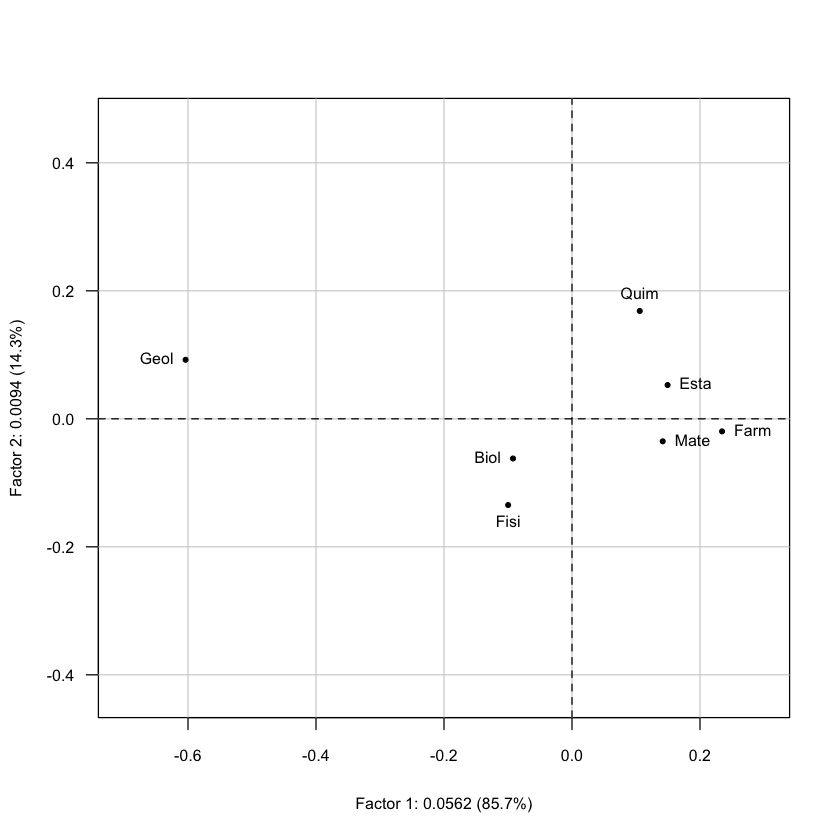

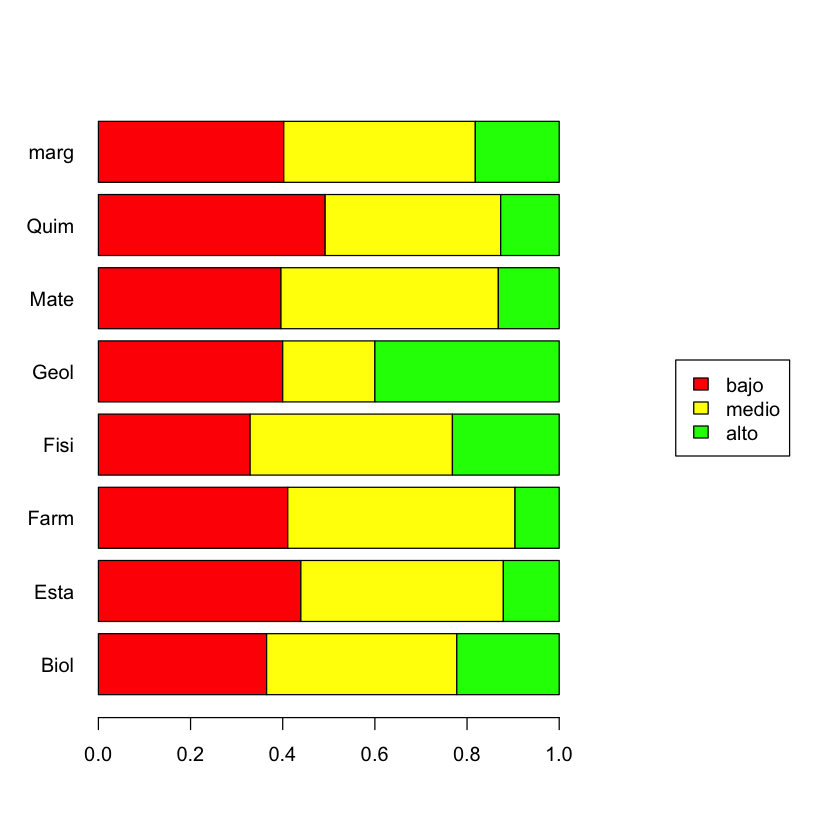

In [182]:
acs<-dudi.coa(K,scannf=FALSE) 
plot(acs,Tcol=FALSE,xlim=c(-0.7,0.3),cframe=1,asp=1) 
plotct(K,"row",col=c("red","yellow","green"))

3. Representación geométrica de los perfiles columna (condicionales)

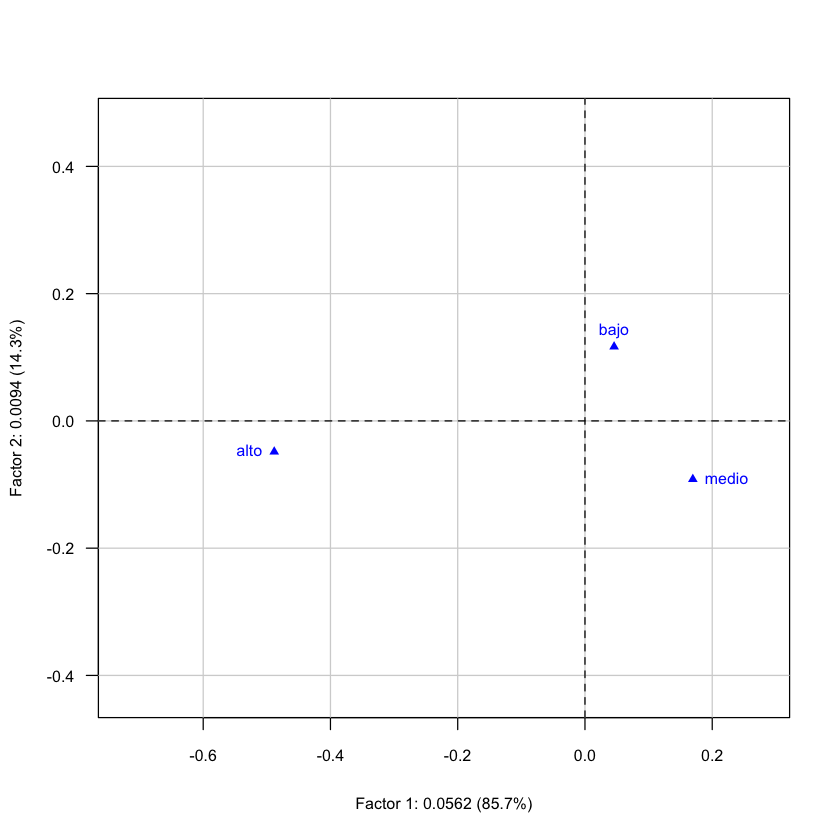

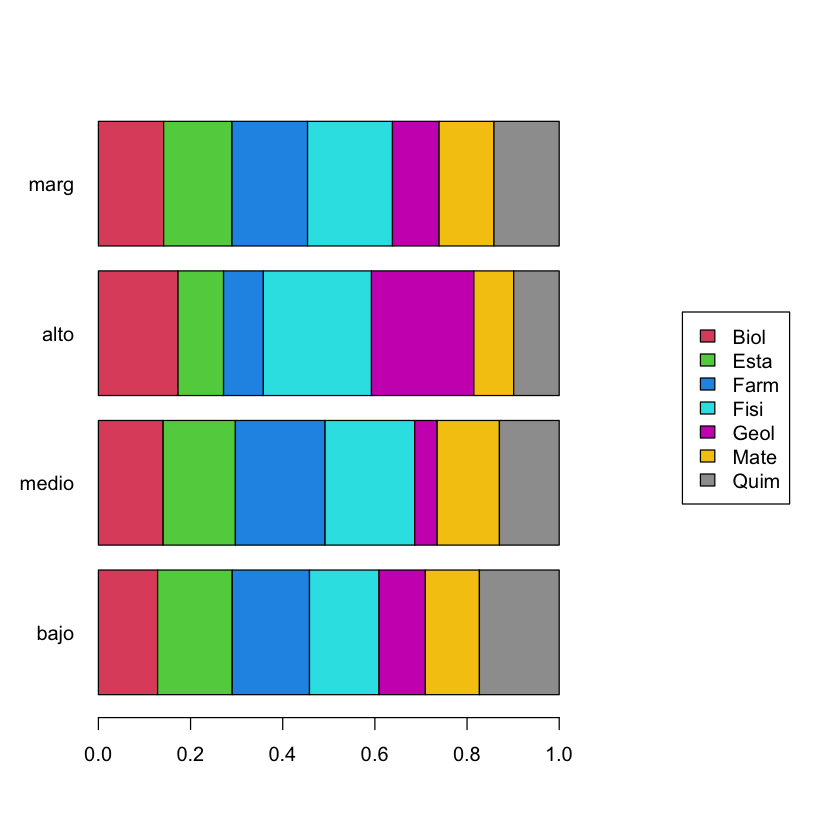

In [183]:
plot(acs,Trow=FALSE,asp=1) 
plotct(t(K),"row",col=2:8)

3. Representación superpuesta o simultánea

<center>
<img src="https://www.researchgate.net/profile/Alfonso-Zavaleta-3/publication/33552394/figure/fig1/AS:645104205312001@1530816236474/Figura-1-Esquema-de-la-representacion-simultanea-del-analisis-de-correspondencias-simple.png" alt="Relaciones cuasibaricéntricas" width="350" height="450">
<center>

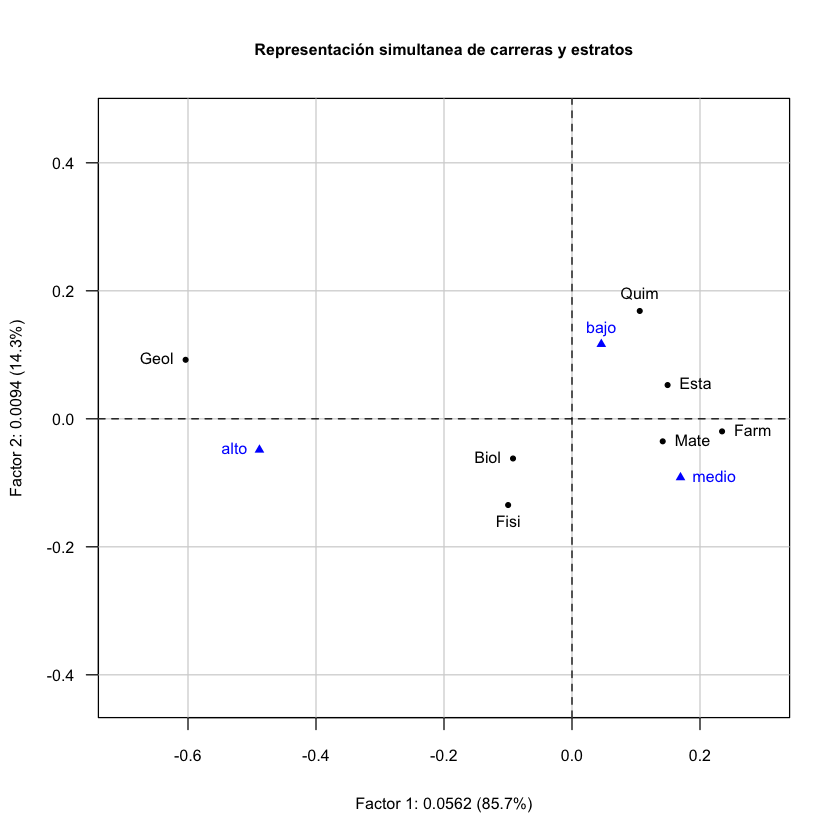

In [184]:
plot(acs,xlim=c(-0.7,0.3),cframe=1,
     main="Representación simultanea de carreras y estratos")

4. Ayudas para la interpretación

In [185]:
ayuacs<-inertia(acs,T,T)
# carreras
round(cbind(acs$li,Ca=ayuacs$row.abs,cos2=ayuacs$row.rel,conInercia=ayuacs$row.contrib),2)
# estratos
round(cbind(acs$co,Ca=ayuacs$col.abs,cos2=ayuacs$col.rel,conInercia=ayuacs$col.contrib),2)

,Axis1,Axis2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Biol,-0.09,-0.06,2.14,5.79,-68.86,-31.14,2.66
Esta,0.15,0.05,5.89,4.39,88.91,11.09,5.67
Farm,0.23,-0.02,16.05,0.67,99.30,-0.70,13.85
Fisi,-0.10,-0.13,3.26,35.61,-35.43,-64.57,7.90
Geol,-0.60,0.09,65.58,9.16,-97.72,2.28,57.50
Mate,0.14,-0.04,4.26,1.57,94.20,-5.80,3.87
Quim,0.11,0.17,2.82,42.81,28.29,71.71,8.55


,Comp1,Comp2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bajo,0.05,0.12,1.50,58.27,13.35,86.65,9.63
medio,0.17,-0.09,21.26,37.17,77.39,-22.61,23.54
alto,-0.49,-0.05,77.24,4.56,-99.02,-0.98,66.83


## <span style="color:blue"><center>Análisis de correspondencias múltiples (ACM)</center></span>

<figure> 
<img src="../imagenes/Diagdudiacm.png"  width="960" height="960" align="left"/> 

**Y** es una tabla individuos $\times$ variables cualitativas y *nf* el número de ejes a retener para lectura e interpretación. En el objeto de salida *cr* son las razones de correlación entre las variables cualitativas y los ejes factoriales.

### <span style="color:blue"><center>Ejemplo: descripción de admitidos según algunas variables sociodemográficas</center></span>

- Descripción de los 445 admitidos a la Facultad de Ciencias, para el semestre de 2013-I.
- Datos disponibles en *admi{FactoClass}*
- Se utilizan como variables activas las sociodemográficas disponibles: 
    - Género: Femenino, Masculino
    - Edad: 16 o menos, 17, 18, 19 o más
    - Estrato: bajo, medio, alto
    - Procedencia: Bogotá, Cundinamarca, Otro


1. Tabla de datos

In [186]:
Y<-admi[,8:11]
"Dimensiones de Y"
dim(Y)

[1] "Dimesniones de Y"

[1] 445   4

Extracto de la tabla de datos: filas múltiples de 25

In [189]:
sel<-seq(25,425,25); Y[sel,]

,gene,estr,orig,edad
,<fct>,<fct>,<fct>,<fct>
25,F,medio,Otro,a17
50,M,bajo,Bogo,a18
75,M,bajo,Bogo,a17
100,M,medio,Bogo,a18
125,F,medio,Otro,a17
150,F,bajo,Bogo,a16m
175,M,alto,Bogo,a19M
200,F,bajo,Otro,a17
225,M,alto,Otro,a16m


2. Tabla disyuntiva completa (TDC): **Z** = codificación *dot hot*

Tabla de admitidos x categorías

In [192]:
Z<-acm.disjonctif(Y)
"Dimensiones de Z"
dim(Z)
names(Z)<-substr(names(Z),6,8)
Z[sel,] #sel<-seq(25,425,25)

[1] "Dimensiones de Z"

[1] 445  12

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,1,0,0,1,0,0,0,1,0,1,0,0
50,0,1,1,0,0,1,0,0,0,0,1,0
75,0,1,1,0,0,1,0,0,0,1,0,0
100,0,1,0,1,0,1,0,0,0,0,1,0
125,1,0,0,1,0,0,0,1,0,1,0,0
150,1,0,1,0,0,1,0,0,1,0,0,0
175,0,1,0,0,1,1,0,0,0,0,0,1
200,1,0,1,0,0,0,0,1,0,1,0,0
225,0,1,0,0,1,0,0,1,1,0,0,0


3. Tabla de Burt

Tabla de categoría x categorías denominada también tabla de contingencias múltiples

In [193]:
Z<-as.matrix(Z)
B<-t(Z)%*%Z
B

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
F,128,0,46,59,23,89,9,30,46,45,18,19
M,0,317,133,126,58,222,29,66,72,126,38,81
baj,46,133,179,0,0,95,22,62,44,58,22,55
med,59,126,0,185,0,151,11,23,47,74,26,38
alt,23,58,0,0,81,65,5,11,27,39,8,7
Bog,89,222,95,151,65,311,0,0,70,116,47,78
Cun,9,29,22,11,5,0,38,0,9,19,2,8
Otr,30,66,62,23,11,0,0,96,39,36,7,14
a16,46,72,44,47,27,70,9,39,118,0,0,0
a17,45,126,58,74,39,116,19,36,0,171,0,0


4. Selección del número de ejes para la lectura e interpretación

Inertia information:
Call: inertia.dudi(x = acm)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  0.3366  0.3366   16.83
Ax2  0.3128  0.6493   32.47
Ax3  0.2827  0.9320   46.60
Ax4  0.2471  1.1791   58.96
Ax5  0.2408  1.4199   71.00
Ax6  0.2293  1.6493   82.46
Ax7  0.2075  1.8568   92.84
Ax8  0.1432  2.0000  100.00

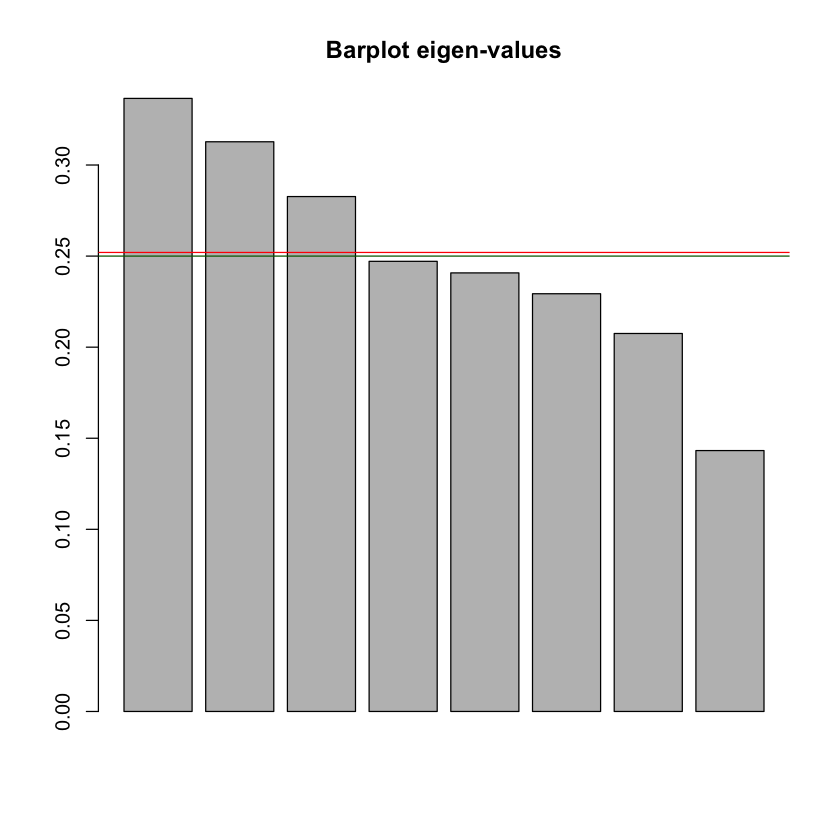

In [194]:
acm<-dudi.acm(Y,scannf=FALSE,nf=3)
inertia(acm)
barplot(acm$eig,main="Barplot eigen-values")
#linea verde promedio de los valores propios
abline(h=sum(acm$eig)/8,col="darkgreen")
#mayores a linea roja, 1/4 (4 es el número de variables)
#ejes no parásitos (ver criterio de Benzécri)
#(+0.002 para que no tape la linea verde)
abline(h=1/4+0.002,col="red") 

Se seleccionaron 3 ejes, con los tres criterios
- Forma del histograma
- Valores propios superiores el promedio de ellos
- Valores propios superiores a *1/s* (s es el número de variables --aquí 4--)

5. Representación de los individuos (admitidos)

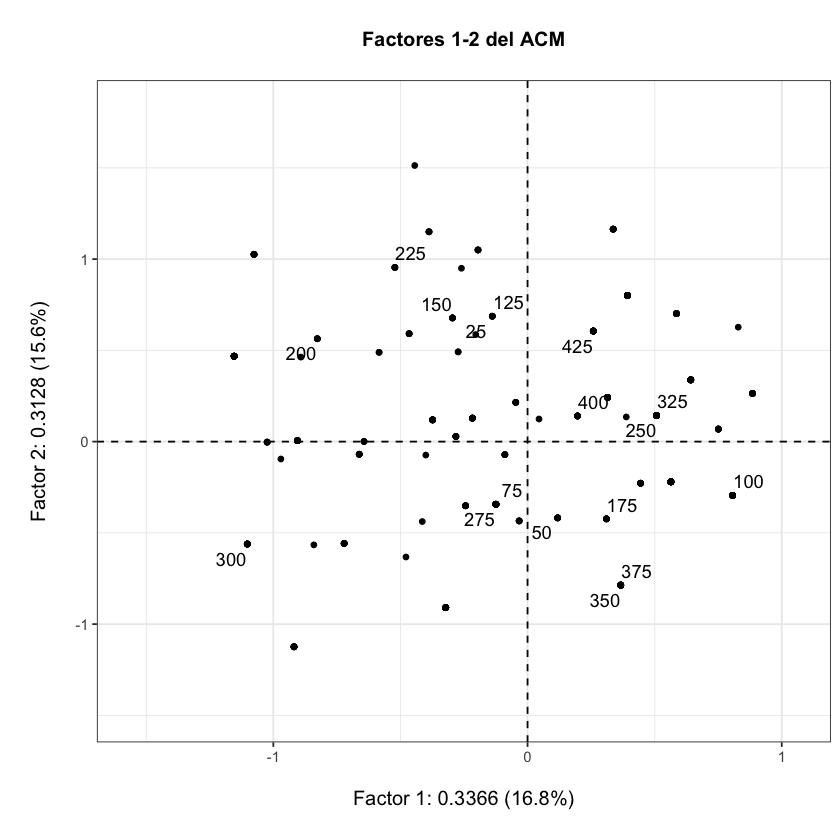

In [195]:
plot(acm,Tcol=FALSE,gg=TRUE,roweti=sel,main="Factores 1-2 del ACM")

6. Representación de las categorías

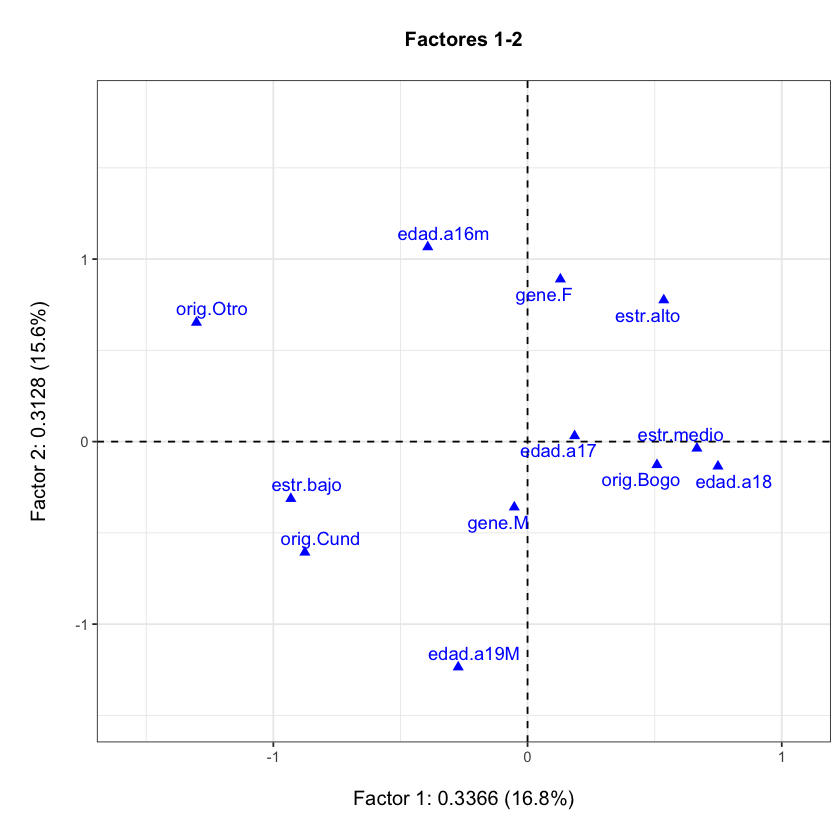

In [196]:
plot(acm,Trow=FALSE,gg=TRUE,main="Factores 1-2")

Coordenadas y ayudas para la interpretación de las categoría en los tres primeros ejes

In [200]:
ayuacm<-inertia(acm,,T)
round(cbind(acm$co,ayuacm$col.abs,ayuacm$col.rel,contColumna=ayuacm$col.contrib),2)
"Porcentaje de contribución promedio de las categorías"
round(sum(acm$eig)/12*100,2)

,Comp1,Comp2,Comp3,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3,contColumna
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gene.F,0.13,0.89,0.51,0.36,18.21,6.66,0.67,31.97,10.58,8.90
gene.M,-0.05,-0.36,-0.21,0.14,7.35,2.69,-0.67,-31.97,-10.58,3.60
estr.bajo,-0.93,-0.31,0.18,25.90,3.15,1.17,-58.34,-6.58,2.21,7.47
estr.medio,0.67,-0.04,0.31,13.71,0.05,3.61,31.59,-0.10,6.99,7.30
estr.alto,0.54,0.78,-1.12,3.88,8.75,20.06,6.39,13.38,-27.73,10.22
orig.Bogo,0.51,-0.13,0.11,13.45,0.91,0.70,60.15,-3.76,2.65,3.76
orig.Cund,-0.88,-0.61,-1.44,4.87,2.51,15.72,-7.16,-3.44,-19.43,11.43
orig.Otro,-1.30,0.65,0.23,27.18,7.34,0.97,-46.66,11.71,1.39,9.80
edad.a16m,-0.39,1.07,0.29,3.04,24.09,1.99,-5.56,41.02,3.07,9.19


[1] "Porcentaje de contribución promedio de las categorías"

[1] 16.67

7. Representación simultánea de individuos (admitidos) x categorías

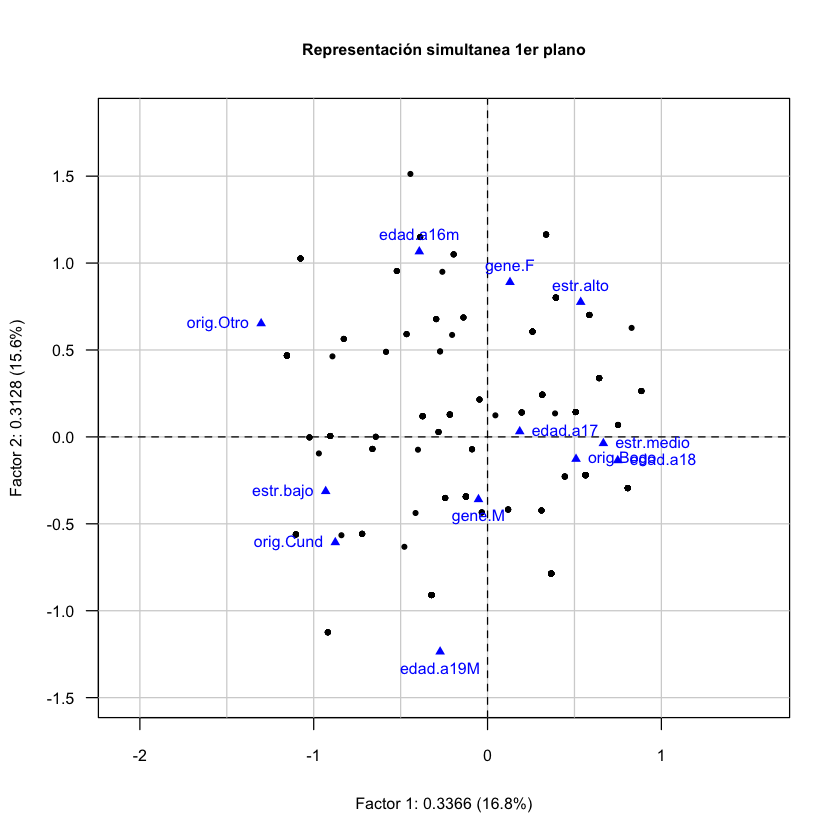

In [201]:
plot(acm,roweti="",main="Representación simultanea 1er plano")

8. Representación de las variables (razones de correlación)

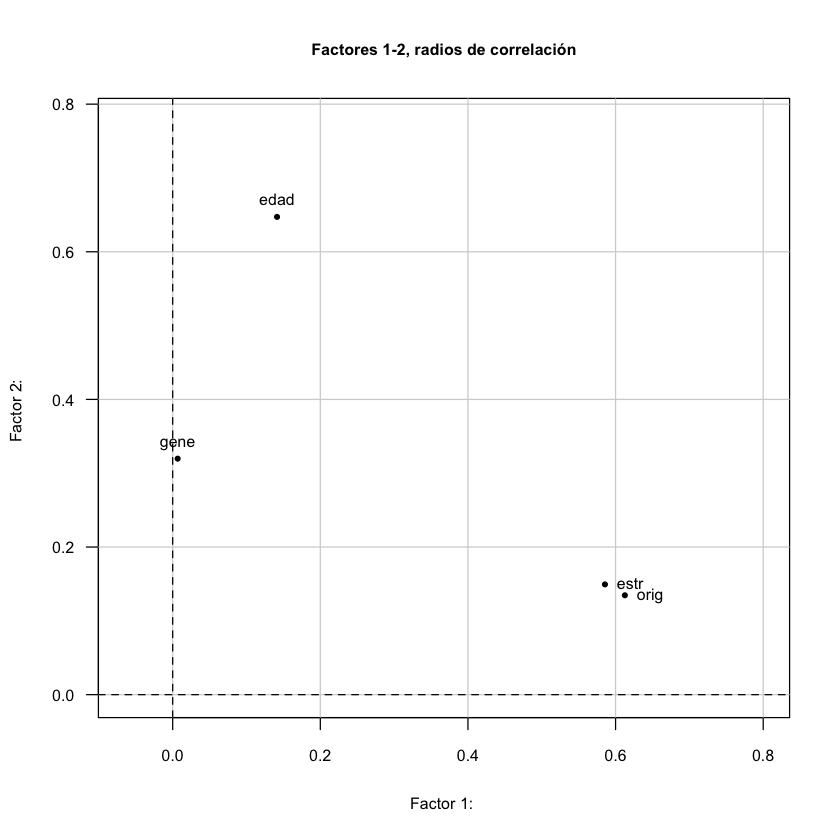

In [202]:
plotfp(acm$cr,main="Factores 1-2, radios de correlación") # función de FactoClass

9. Proyección de las carreras como variable cualitativa suplementaria

[1] "Coordenadas y ayudas para la interpretación"

,ncat,dis2,coor.Axis1,coor.Axis2,coor.Axis3,valt.Axis1,valt.Axis2,valt.Axis3,cos2.Axis1,cos2.Axis2,cos2.Axis3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
qual.Biol,63,6.063492,-0.018,0.146,-0.068,-0.156,1.245,-0.579,0.0001,0.0035,0.0008
qual.Esta,66,5.742424,0.029,-0.104,-0.018,0.255,-0.912,-0.160,0.0001,0.0019,0.0001
qual.Farm,73,5.095890,0.168,0.198,0.392,1.566,1.845,3.664,0.0055,0.0077,0.0302
qual.Fisi,82,4.426829,0.095,-0.029,-0.127,0.948,-0.292,-1.267,0.0020,0.0002,0.0036
qual.Geol,45,8.888889,-0.040,0.076,-0.635,-0.284,0.540,-4.490,0.0002,0.0007,0.0454
qual.Mate,53,7.396226,-0.050,-0.462,0.112,-0.387,-3.579,0.869,0.0003,0.0289,0.0017
qual.Quim,63,6.063492,-0.259,0.106,0.156,-2.217,0.907,1.335,0.0111,0.0019,0.0040


[1] "Razones de correlación"

,Axis1,Axis2,Axis3
qual,1.64,3.88,7.47


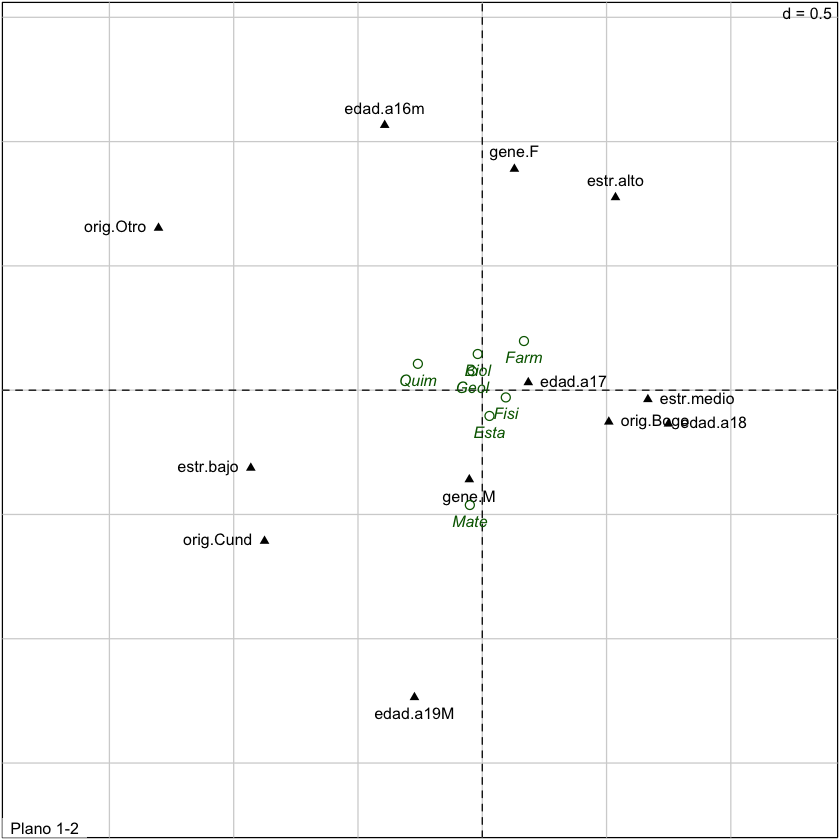

In [211]:
supCarr<-supqual(acm,admi$carr)
attach(supCarr)
"Coordenadas y ayudas para la interpretación"
data.frame(ncat,dis2,coor=round(coor,3),valt=round(tv,3),cos2=round(cos2,4))
"Razones de correlación"
round(scr*100,2)
detach(supCarr)
plot(acm,Trow =FALSE,infaxes="no",main="Plano 1-2",
ylim =c( -1.5 ,1.3) , col.col=" black ")
points( supCarr$coor ,col ="darkgreen")
text(supCarr$coor , labels = attributes (admi[,1])$levels ,
col ="darkgreen",pos =1, cex =0.8 , font =3)

- Sólo es legítimo interpretar como diferente de cero las coordenadas de: 
- Química (-) sobre el primer eje, Matemáticas (+) sobre el segundo eje; y Geología (-) opuesto a Farmacia (+) sobre el tercer eje.  
 - Química  tiene, en comparación al promedio, mayor proporción de admitidos de  estrato bajo y origen fuera de Bogotá,
 - Matemáticas  de 19 o más años, 
 - Geología de 17 años y de estrato alto,  
 - Farmacia de 18 años y género femenino. 

10. El ACM como método de pretratamiento de variables cualitativas: cuatificación, filtro y reducción de dimemsión

<figure> 
<img src="../imagenes/clasVarNom.png"  width="600" height="600" align="left"/> 

1. De la tabla de individuos por variables cualitativas (nominales o ordinales) se pasa a una tabla de individuos x variables cuantitativas (coordenadas factoriales). Es un mecanismo de cuatificación.

2. Al proceso de agrupamiento (clasificación no supervisada) no se toman tods los ejes sino los *S* primeros (valor a determinar). Mecanismo de filtro y de reducción de dimensión.

3. Cualquier procedimiento estadístico, de minería o aprendizaje para variables cuantivativas puede hacerce a partir de la tabla de coordenadas factoriales. En discriminación (clasificación supervisada) es también un mecanismo de regularización.

4. Nótese que no es lo mismo hacer ACP de una codificación *dot hot*, tabla de ceros y unos de individuos por categorías. El ACM es el el análisis de correspondencias (AC) de una tabla *dot hot*, indicadora de varias particiones del conjunto de datos.

5. La presentación de los métodos, cada uno como un ACP generalizado particular, permite programarlos con programas de ACP, con las transformaciones necesarias.

# Muchas gracias por su atención

Campo Elías Pardo, Email: cepardot@unal.edu.co